# 1- Introduction

This dataset captures the purchasing behavior of 9,506 online clients for a major American retailer, Vanguard, over the past 12 months. It belongs to Retail and E-commerce industry. Overall, it provides a comprehensive view of online shopping behavior and customer demographics, essential for analyzing purchasing trends and enhancing strategic decisions for a retail company’s online presence.

Here is the description of the dataset and the variables:
image.png


## Important Assumption

The dataset includes various demographic details, customer segmentation, and purchasing patterns. However, there is an issue with the dataset: the documentation needed to understand the customer segmentation variables and their respective classes is inadequate. There is only sufficient clarity on the variables that indicate customer purchasing behavior and demographics. However, choosing any of the customer segmentation variables as the target variable would be most appropriate for making predictions, as these are the effects of the causal variables—purchasing patterns and demographics. Therefore, to meet the project requirements within the available time constraints, a robust segmentation model is being developed with 'segment_1' as the outcome variable. Details of its respective classes will be derived later in stakeholder meetings.

# 2- Exploratory Data Analysis
loading the dataset and necessary packages for performing EDA.

In [220]:
# Install required libraries
! pip install numpy pandas matplotlib seaborn scikit-learn openpyxl

In [221]:
# Libraries for data manipulation
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Improve the aesthetics of the visualizations
sns.set()

# Configuration settings for display options
pd.set_option("display.max_columns", None)  # No limit on the number of displayed columns
pd.set_option("display.max_rows", 200)      # Display up to 200 rows

# Suppress warnings for cleaner output (consider being more selective with warnings to ignore)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset from a specified file path
df = pd.read_excel(r"C:\Users\palad\Downloads\ONLINE_CLIENTS_SV.xlsx", sheet_name='DB')

# Show the first few rows of the dataset to verify it's loaded correctly
df.head()

CLIENT_ID  CUMMSALES_LAST12WEEKS  FREQUENCY_LAST12WEEKS  AVERAGE_TICKET  \
0      22335               7516.357                     10        751.6357   
1      22349                860.535                      1        860.5350   
2      22389               1576.317                      2        788.1585   
3      22679               4531.182                      3       1510.3940   
4      22878               6193.583                      1       6193.5830   

   RECENCY  CONSISTENCY  BRANCH SEGMENT_1 LOYALTY_GROUP  \
0       11            8    2979      Core           Vip   
1       49            1    2979      Core     Ocasional   
2       74            1    2979      Core     Ocasional   
3       24            2    2961      Core     Ocasional   
4       70            1    2979      Core     Ocasional   

                  PRICE_GROUP SEGMENT_2  GENDER MARITAL_STATUS BIRTH_DATE  \
0        Very Price Sensitive         B  Female        Married 1973-11-12   
1   Selective Price Sensitive         B  Female        Married 1988-04-24   
2        Very Price Sensitive         B  Female        Married 1977-01-15   
3  Moderately Price Sensitive         B    Male        Married 1987-05-20   
4   Selective Price Sensitive         B    Male        Married 1968-09-07   

         AGE MOSTUSED_PLATFORM  
0  44.569863            Mobile  
1  30.112329               Web  
2  41.391781            Mobile  
3  31.043836            Mobile  
4  49.753425               Web

In [222]:
# checking shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 9504 rows and 16 columns.


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CLIENT_ID              9504 non-null   int64         
 1   CUMMSALES_LAST12WEEKS  9504 non-null   float64       
 2   FREQUENCY_LAST12WEEKS  9504 non-null   int64         
 3   AVERAGE_TICKET         9504 non-null   float64       
 4   RECENCY                9504 non-null   int64         
 5   CONSISTENCY            9504 non-null   int64         
 6   BRANCH                 9504 non-null   int64         
 7   SEGMENT_1              9504 non-null   object        
 8   LOYALTY_GROUP          9504 non-null   object        
 9   PRICE_GROUP            9504 non-null   object        
 10  SEGMENT_2              9504 non-null   object        
 11  GENDER                 9503 non-null   object        
 12  MARITAL_STATUS         9503 non-null   object        
 13  BIR

## Dropping Redundant Variables
Overall, columns like Client_ID, Birth_Date are redundant for this particular dataset analysis. The reasons are: Client ID is just a unique identifier, the presence of column *'Age'* makes '*Birth_date*'  not so effective to use, especially when the project's goal is not focussed on time series or trends over time. These are to be dropped. Then, Branch which represents branch where a transaction happened is supposed to be in factor type. Also lets rename *CUMMSALES_LAST12WEEKS* to *CUMSALES* and *FREQUENCY_LAST12WEEKS* to *FREQUENCY.*

In [225]:
# To retain the original DataFrame, a copy is made.
data = df.copy()

# Drop redundant columns and create a new DataFrame 'data' with the remaining columns
data = data.drop(['CLIENT_ID', 'BIRTH_DATE'], axis=1)

#Change Branch into appropriate datatype
data['BRANCH'] = data['BRANCH'].astype('object')

#renaming columns for brevity and unnecessary distractions
data.rename(columns={'CUMMSALES_LAST12WEEKS': 'CUMSALES', 'FREQUENCY_LAST12WEEKS': 'FREQUENCY'}, inplace=True)

data.head()

CUMSALES  FREQUENCY  AVERAGE_TICKET  RECENCY  CONSISTENCY BRANCH SEGMENT_1  \
0  7516.357         10        751.6357       11            8   2979      Core   
1   860.535          1        860.5350       49            1   2979      Core   
2  1576.317          2        788.1585       74            1   2979      Core   
3  4531.182          3       1510.3940       24            2   2961      Core   
4  6193.583          1       6193.5830       70            1   2979      Core   

  LOYALTY_GROUP                 PRICE_GROUP SEGMENT_2  GENDER MARITAL_STATUS  \
0           Vip        Very Price Sensitive         B  Female        Married   
1     Ocasional   Selective Price Sensitive         B  Female        Married   
2     Ocasional        Very Price Sensitive         B  Female        Married   
3     Ocasional  Moderately Price Sensitive         B    Male        Married   
4     Ocasional   Selective Price Sensitive         B    Male        Married   

         AGE MOSTUSED_PLATFORM  
0  44.569863            Mobile  
1  30.112329               Web  
2  41.391781            Mobile  
3  31.043836            Mobile  
4  49.753425               Web

##  Null Values Detected

In [227]:
data.isnull().sum()

CUMSALES                0
FREQUENCY               0
AVERAGE_TICKET          0
RECENCY                 0
CONSISTENCY             0
BRANCH                  0
SEGMENT_1               0
LOYALTY_GROUP           0
PRICE_GROUP             0
SEGMENT_2               0
GENDER                  1
MARITAL_STATUS          1
AGE                  1158
MOSTUSED_PLATFORM       0
dtype: int64

There are just 1 each missing values in Gender and Marital_status columns. Considering more than 9000 observations, dropping 2 rows would not make troublesome difference. Whereas, the Age column has more than 10% (1158) of missing null values of the total rows (9000+), for that reason dropping is not a good option as precious data that could be useful for accurate predictions could be lost. So, we shall decide which specific imputation to perform on it as we go on with EDA in further steps.

## Anamalies/Outliers Detected

In [230]:
data.describe().T

count         mean          std       min         25%  \
CUMSALES        9504.0  3749.918529  7057.653117  2.500000  694.732750   
FREQUENCY       9504.0     3.216961     4.106171  1.000000    1.000000   
AVERAGE_TICKET  9504.0  1248.730602  2406.863554  2.500000  482.148824   
RECENCY         9504.0    28.771044    24.240985  0.000000    7.000000   
CONSISTENCY     9504.0     2.793876     2.611770  1.000000    1.000000   
AGE             8346.0    35.985055    10.036625  2.350685   29.595890   

                        50%          75%            max  
CUMSALES        1713.387000  4473.282250  279970.140000  
FREQUENCY          2.000000     4.000000     135.000000  
AVERAGE_TICKET   857.233875  1383.428333  130698.600000  
RECENCY           21.000000    48.000000      83.000000  
CONSISTENCY        2.000000     4.000000      12.000000  
AGE               34.783562    40.599315      97.810959

This indicates anamolies in the above continuous variables. EDA can point this out easily.

In [232]:
#summary for categorical variables
data.describe(include= 'object').T

count unique                     top  freq
BRANCH             9504     25                    2978   928
SEGMENT_1          9504      2                      Up  5643
LOYALTY_GROUP      9504      4               Ocasional  6910
PRICE_GROUP        9504      5  Very Price Insensitive  2515
SEGMENT_2          9504      6                       A  2589
GENDER             9503      2                  Female  7445
MARITAL_STATUS     9503      3                 Married  5300
MOSTUSED_PLATFORM  9504      3                     Web  4929

The column BRANCH also has to be dropped as it is unlikely to add value to the model. The target variable 'SEGMENT_1' can also be determined by other key variables related to customer behavior and purchase patterns. Including 'BRANCH', with its multiple classes (25), would introduce unnecessary complexity without contributing significantly to the prediction, potentially leading to inefficiency or overfitting. Also, let's see if there is any useful possibility of reducing the variables with 5 and 6 classes after EDA.

In [234]:
#Drop Branch column
data = data.drop(['BRANCH'], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUMSALES           9504 non-null   float64
 1   FREQUENCY          9504 non-null   int64  
 2   AVERAGE_TICKET     9504 non-null   float64
 3   RECENCY            9504 non-null   int64  
 4   CONSISTENCY        9504 non-null   int64  
 5   SEGMENT_1          9504 non-null   object 
 6   LOYALTY_GROUP      9504 non-null   object 
 7   PRICE_GROUP        9504 non-null   object 
 8   SEGMENT_2          9504 non-null   object 
 9   GENDER             9503 non-null   object 
 10  MARITAL_STATUS     9503 non-null   object 
 11  AGE                8346 non-null   float64
 12  MOSTUSED_PLATFORM  9504 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 965.4+ KB


## Univariate Visuals

In [236]:
def plot_histogram_boxplot(data, feature):
    """
    Plots a histogram and a boxplot for the specified feature in the data.
    Adds mean and median lines to the histogram.

    Args:
    - data: DataFrame containing the data.
    - feature: String representing the column to plot.
    """
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)}, figsize=(12, 8))

    # Boxplot
    sns.boxplot(x=data[feature], ax=ax_box)
    ax_box.set(xlabel='')

    # Histogram
    sns.histplot(data[feature], kde=True, ax=ax_hist)
    mean = data[feature].mean()
    median = data[feature].median()

    # Adding mean and median lines
    ax_hist.axvline(mean, color='r', linestyle='--', linewidth=2)
    ax_hist.axvline(median, color='g', linestyle='-', linewidth=2)

    # Labels
    ax_hist.legend({'Mean': mean, 'Median': median})
    ax_hist.set(title=f'{feature} Distribution')
    ax_hist.set(xlabel=feature, ylabel='Frequency')

    plt.show()




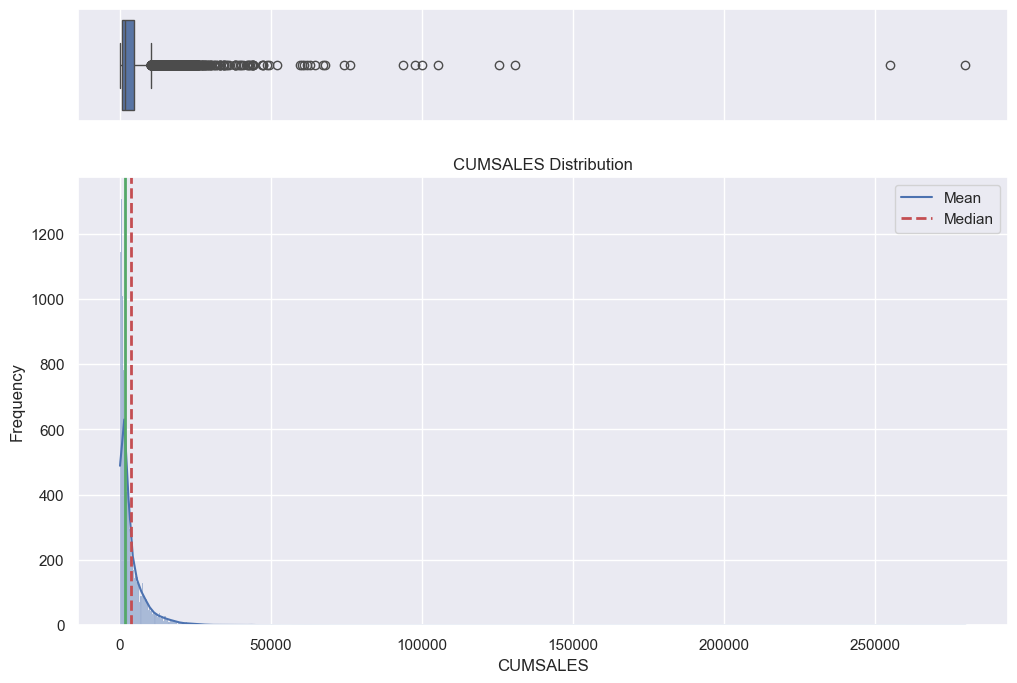

In [237]:
# Plotting cumsales
plot_histogram_boxplot(data, 'CUMSALES')

Presence of more outliers. Not good for model.

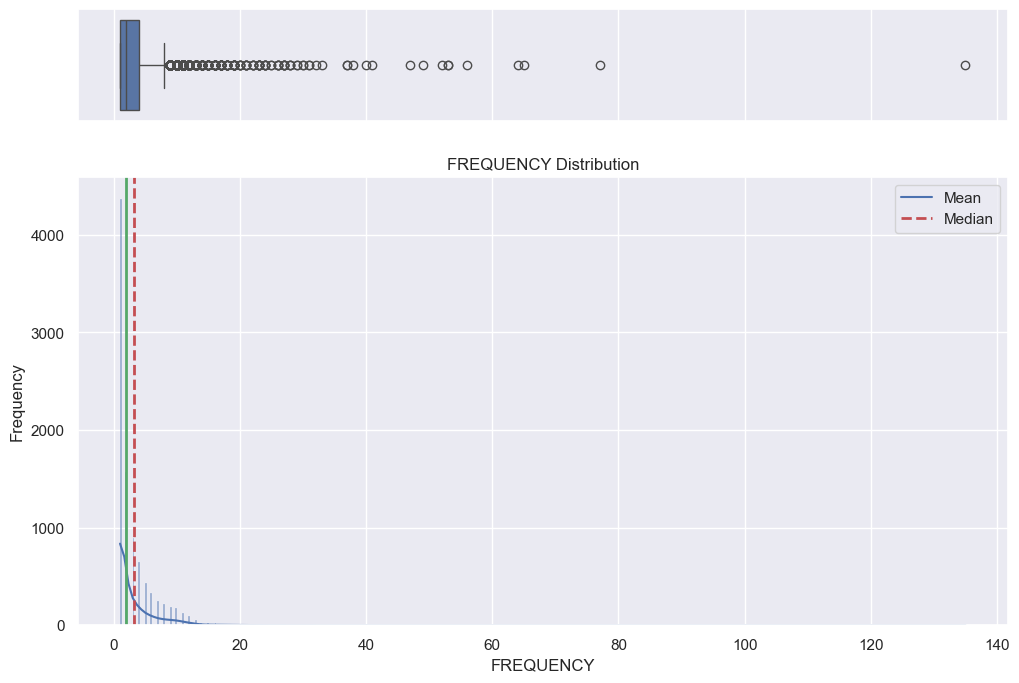

In [239]:
# Plotting frequency
plot_histogram_boxplot(data, 'FREQUENCY')

Outliers present.

In [241]:
# Plotting average ticket
plot_histogram_boxplot(data, 'AVERAGE_TICKET')

Outliers present.

In [243]:
# Plotting recency
plot_histogram_boxplot(data, 'RECENCY')

Recency looks good. Remember it is number of days since last purchase, not months, so fine. Right skewed.

In [245]:
# Plotting consistecency
plot_histogram_boxplot(data, 'CONSISTENCY')

### Imputation of NA in Age variable

Most of the customers fall into the segment visiting once or twice in an year, rarely there were who visited most of the year. They act as outliers.

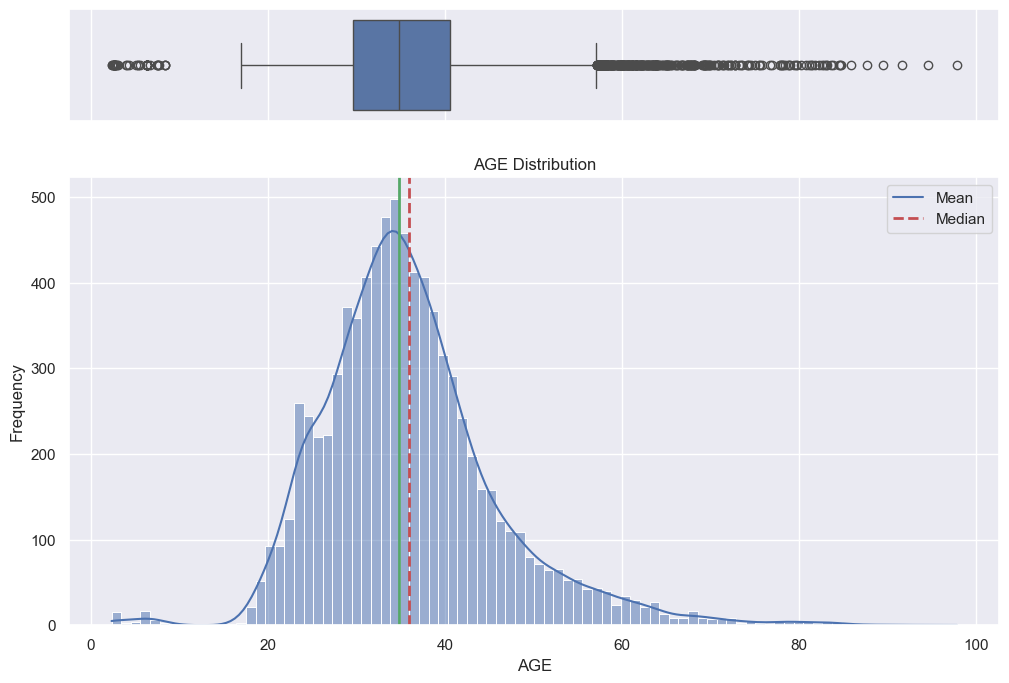

In [248]:
# Plotting age
plot_histogram_boxplot(data, 'AGE')

There is very less chance that anyone below 15 year old places an order. So, outliers on the left of distribution are definitely to be dropped. There are also people who are old which is quite probable considering their proportion. So, lets keep them.

In [250]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1_age = data['AGE'].quantile(0.25)
Q3_age = data['AGE'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR_age = Q3_age - Q1_age

# Define the lower bound (to remove left-side outliers)
lower_bound_age = Q1_age - 1.5 * IQR_age

# Filter data to keep rows where AGE is above the lower bound, but keep NaN values
data = data[(data['AGE'] >= lower_bound_age) | (data['AGE'].isna())]

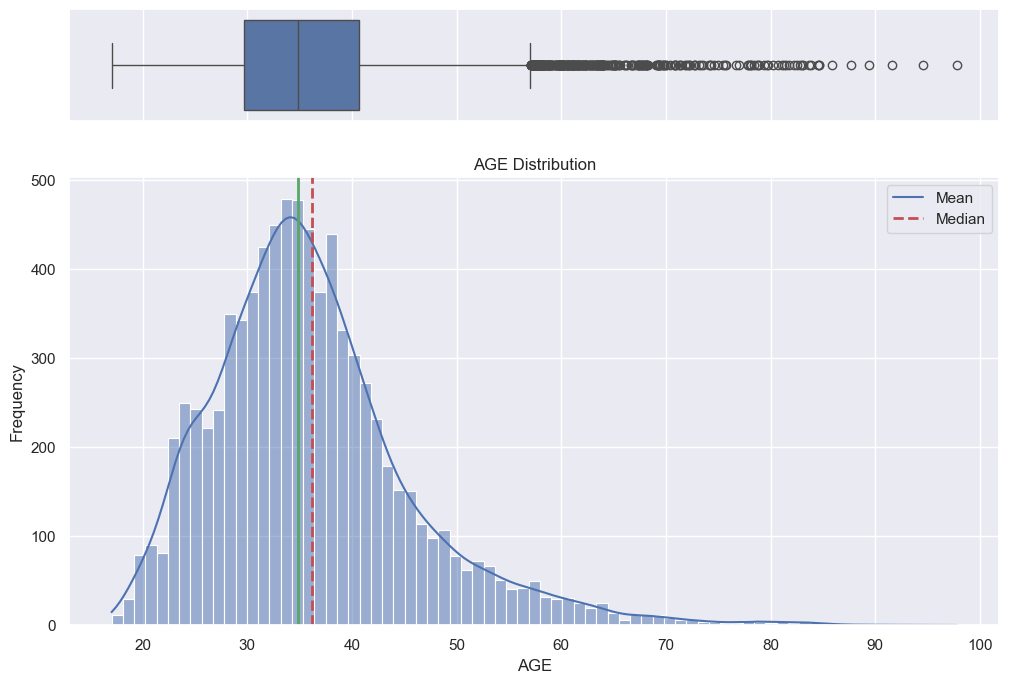

In [251]:
# Plotting age
plot_histogram_boxplot(data, 'AGE')

In [252]:
data.isnull().sum()

CUMSALES                0
FREQUENCY               0
AVERAGE_TICKET          0
RECENCY                 0
CONSISTENCY             0
SEGMENT_1               0
LOYALTY_GROUP           0
PRICE_GROUP             0
SEGMENT_2               0
GENDER                  1
MARITAL_STATUS          1
AGE                  1158
MOSTUSED_PLATFORM       0
dtype: int64

Ofcourse, as we see, variables like age tend to be right skewed. So, let's impute median age value for filling in the more than 10% of those missing values in the AGE variable. Also drop the other rows of missing values in GENDER and MARITAL_STATUS columns as they are just 1 each.

In [254]:
# Impute the median for missing values in 'AGE' column
median_age = data['AGE'].median()
data['AGE'].fillna(median_age, inplace=True)

# Drop rows where 'GENDER' or 'MARITAL_STATUS' is missing
data.dropna(subset=['GENDER', 'MARITAL_STATUS'], inplace=True)

# To verify if the missing values have been handled
print(data.isnull().sum())

CUMSALES             0
FREQUENCY            0
AVERAGE_TICKET       0
RECENCY              0
CONSISTENCY          0
SEGMENT_1            0
LOYALTY_GROUP        0
PRICE_GROUP          0
SEGMENT_2            0
GENDER               0
MARITAL_STATUS       0
AGE                  0
MOSTUSED_PLATFORM    0
dtype: int64


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9454 entries, 0 to 9503
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUMSALES           9454 non-null   float64
 1   FREQUENCY          9454 non-null   int64  
 2   AVERAGE_TICKET     9454 non-null   float64
 3   RECENCY            9454 non-null   int64  
 4   CONSISTENCY        9454 non-null   int64  
 5   SEGMENT_1          9454 non-null   object 
 6   LOYALTY_GROUP      9454 non-null   object 
 7   PRICE_GROUP        9454 non-null   object 
 8   SEGMENT_2          9454 non-null   object 
 9   GENDER             9454 non-null   object 
 10  MARITAL_STATUS     9454 non-null   object 
 11  AGE                9454 non-null   float64
 12  MOSTUSED_PLATFORM  9454 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 1.0+ MB


Thus, the dataset is free of null values. Let's go ahead by performing EDA on factor variables.

In [257]:
#defining plotting fucntions for categorical variables
def bar_plot(data, feature, figsize=(14, 6), order=None):
    """
    Bar plot for categorical variables

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,6))
    order: order of categories (default None)
    """
    plt.figure(figsize=figsize)
    sns.countplot(data=data, x=feature, order=order, palette="viridis")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [258]:
#plotting segment_1
bar_plot(data, 'SEGMENT_1')

Our target variable Segment_1 has less class imbalance. Good sign.

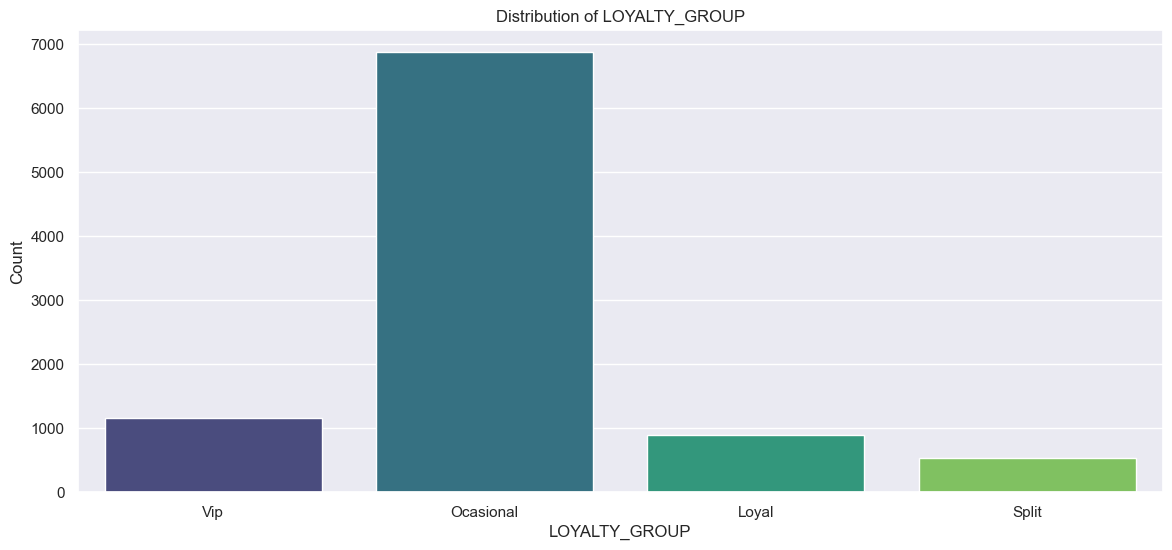

In [260]:
#plotting loyalty_group
bar_plot(data, 'LOYALTY_GROUP')

4 classes in Loayly-group is totally okay.

In [262]:
#plotting price_group
bar_plot(data, 'PRICE_GROUP')

All classes indicate their own group. No need to club any of them.

In [264]:
#plotting segment_2
bar_plot(data, 'SEGMENT_2')

There are a good proportions of observations in each of the 6 classes, lets's not drop and retain all of them to see how the model performs.

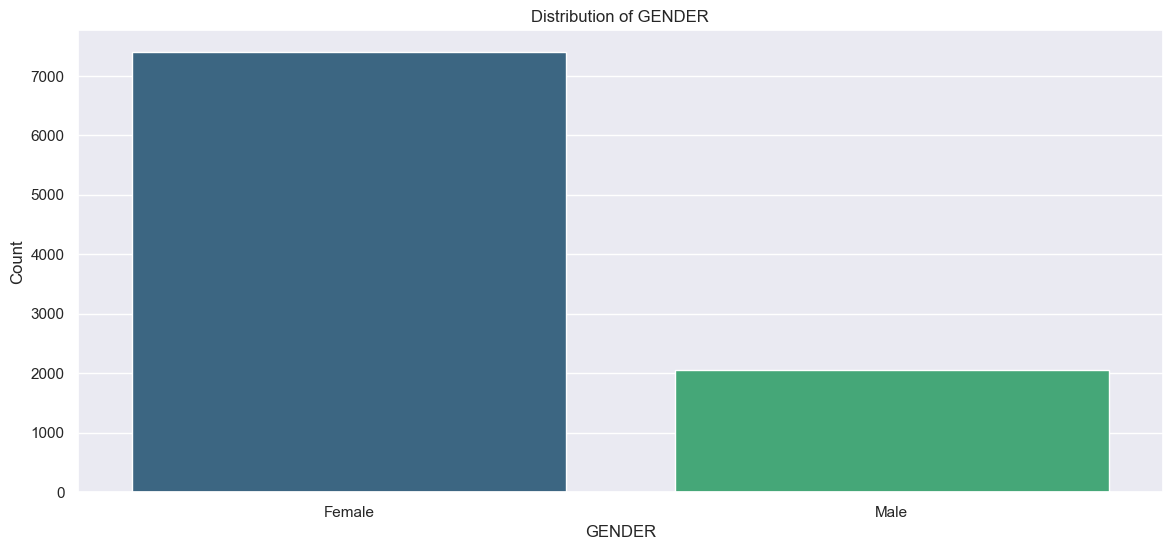

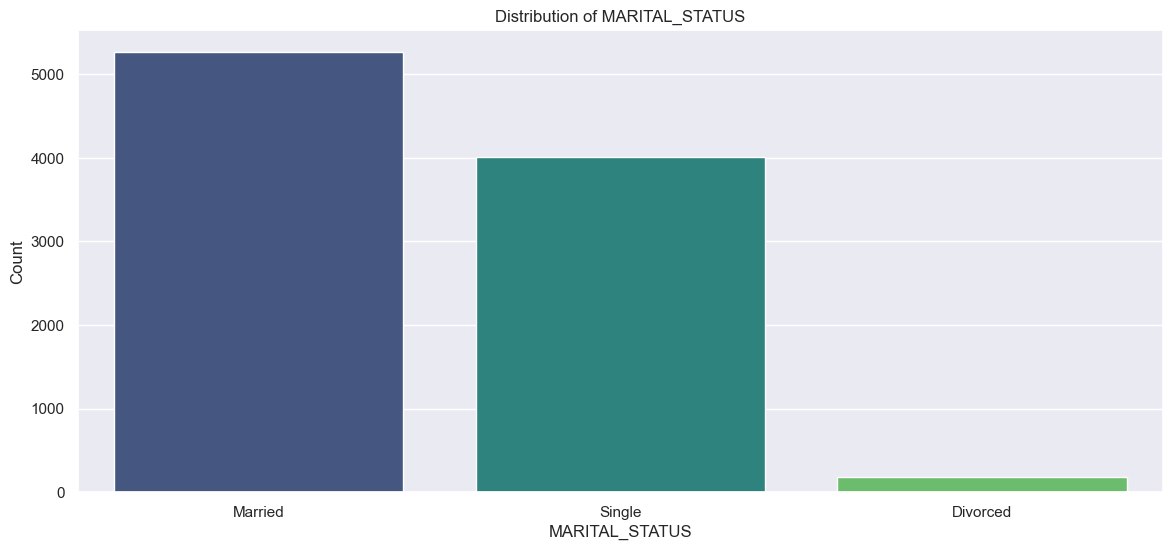

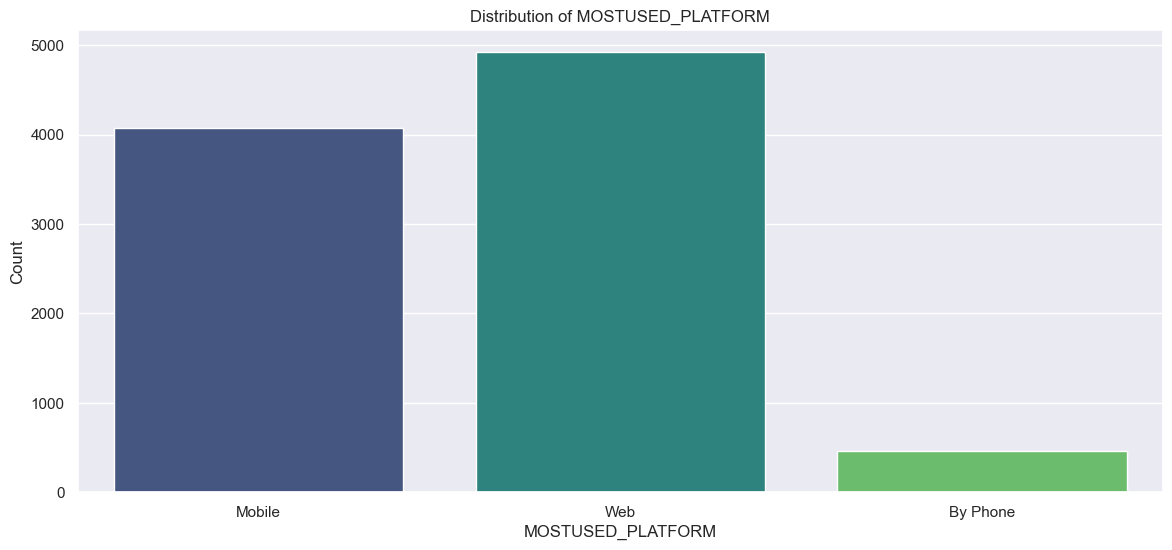

In [266]:
categorical_columns = ['GENDER', 'MARITAL_STATUS', 'MOSTUSED_PLATFORM']

# Plot categorical variables
for column in categorical_columns:
    bar_plot(data, column)

In the MOSTUSED_PLATFORM, Mobile and Phone are same lets club them.

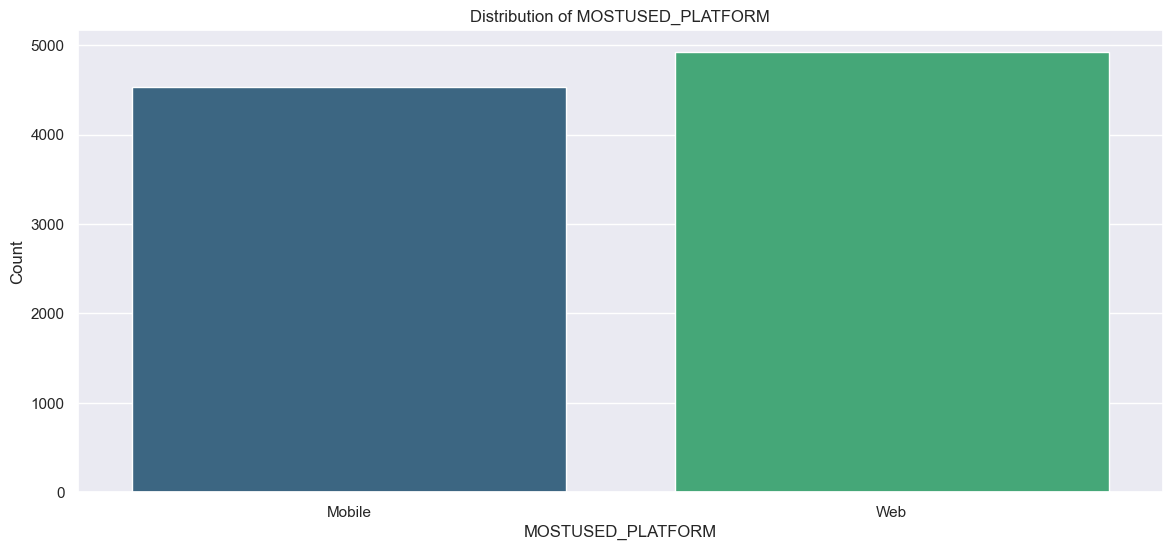

In [268]:
#replacing by phone with mobile
data['MOSTUSED_PLATFORM'] = data['MOSTUSED_PLATFORM'].replace({
     'By Phone': 'Mobile'
    })

bar_plot(data, 'MOSTUSED_PLATFORM')

## Outlier Removal
Time to remove outliers from all numercial columns except AGE which was already taken care of in previous steps. This will ensure that the model understands the patterns well and reduces overfitting because such cases of outlier occurences (for example, customers with very high annual sales amount) are less common. But yes, this comes at a adding a small bias of not able to capture those outlier cases effectively. But that's okay, their number is way lesser than average/general case numbers in the dataset.

In [270]:
def remove_outliers_all_but_age(data):
    """
    Removes outliers from all numerical columns in the DataFrame based on the IQR method,
    except the 'AGE' column.

    Args:
    - data: DataFrame containing the data.

    Returns:
    - A new DataFrame with outliers removed from all numerical columns except 'AGE'.
    """
    # Create a copy of the data to preserve the original DataFrame
    clean_data = data.copy()

    # Loop through all numerical columns except 'AGE'
    for feature in clean_data.select_dtypes(include=['float64', 'int64']).columns:
        if feature == 'AGE':
            continue  # Skip the 'AGE' column

        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = clean_data[feature].quantile(0.25)
        Q3 = clean_data[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for the outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        clean_data = clean_data[(clean_data[feature] >= lower_bound) & (clean_data[feature] <= upper_bound)]

    return clean_data

# Apply the function to remove outliers from all numerical columns except 'AGE'
clean_data = remove_outliers_all_but_age(data)

# Check the resulting DataFrame after outlier removal
clean_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7561 entries, 1 to 9503
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUMSALES           7561 non-null   float64
 1   FREQUENCY          7561 non-null   int64  
 2   AVERAGE_TICKET     7561 non-null   float64
 3   RECENCY            7561 non-null   int64  
 4   CONSISTENCY        7561 non-null   int64  
 5   SEGMENT_1          7561 non-null   object 
 6   LOYALTY_GROUP      7561 non-null   object 
 7   PRICE_GROUP        7561 non-null   object 
 8   SEGMENT_2          7561 non-null   object 
 9   GENDER             7561 non-null   object 
 10  MARITAL_STATUS     7561 non-null   object 
 11  AGE                7561 non-null   float64
 12  MOSTUSED_PLATFORM  7561 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 827.0+ KB


Visualizing after outlier removals

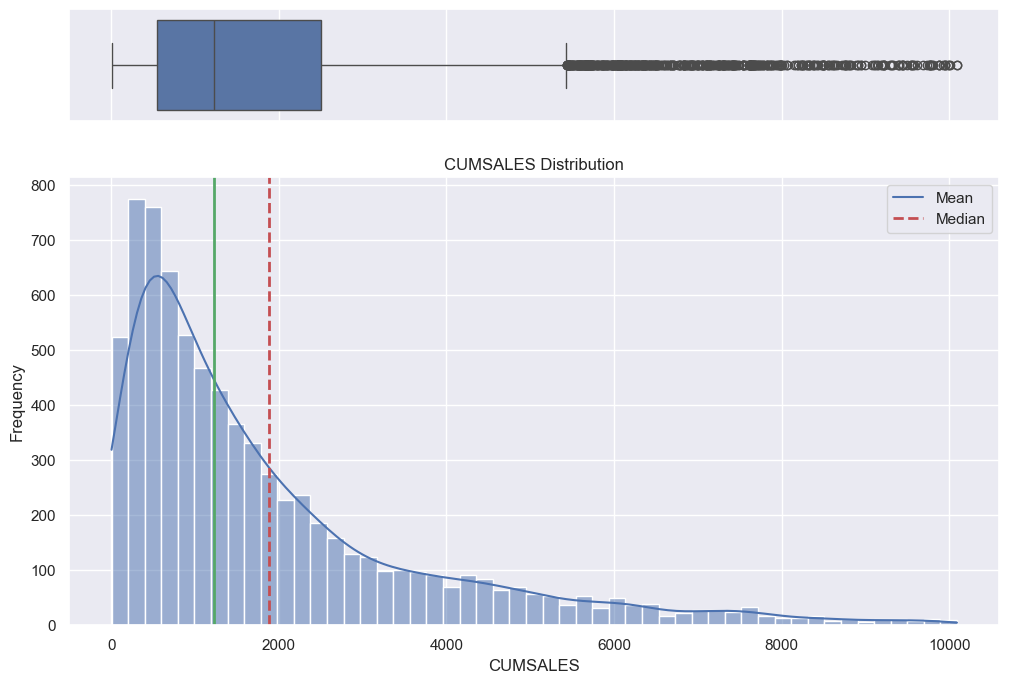

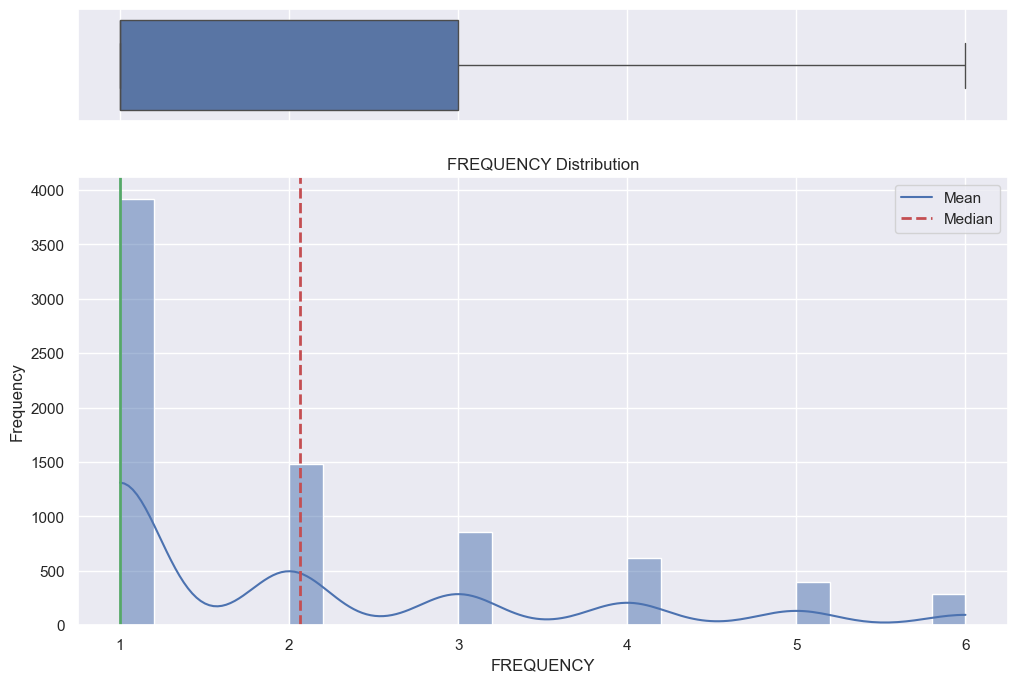

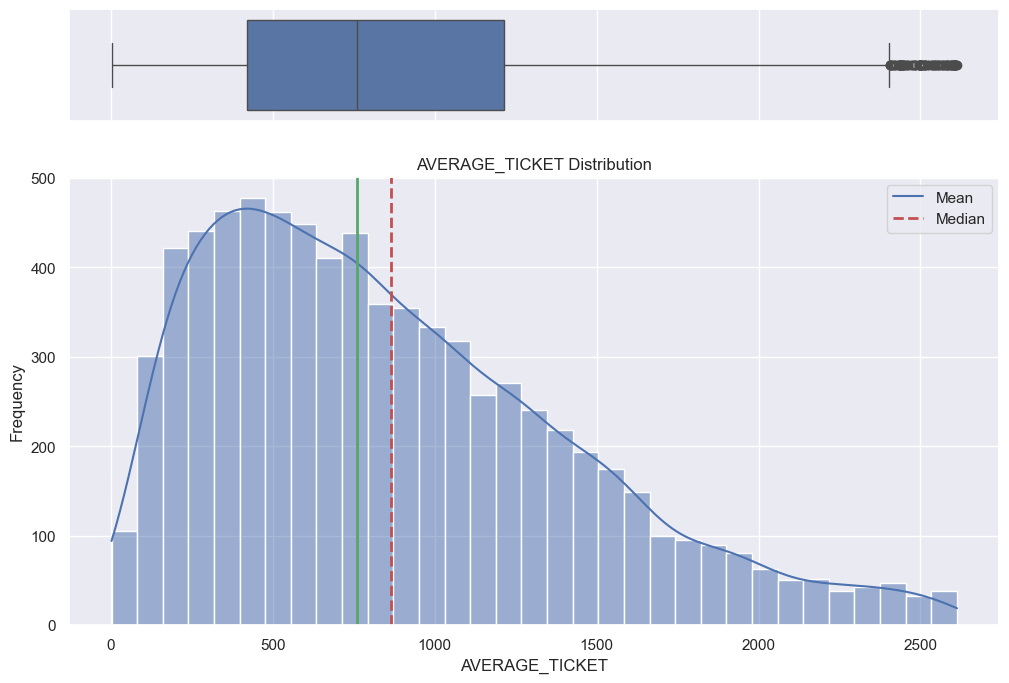

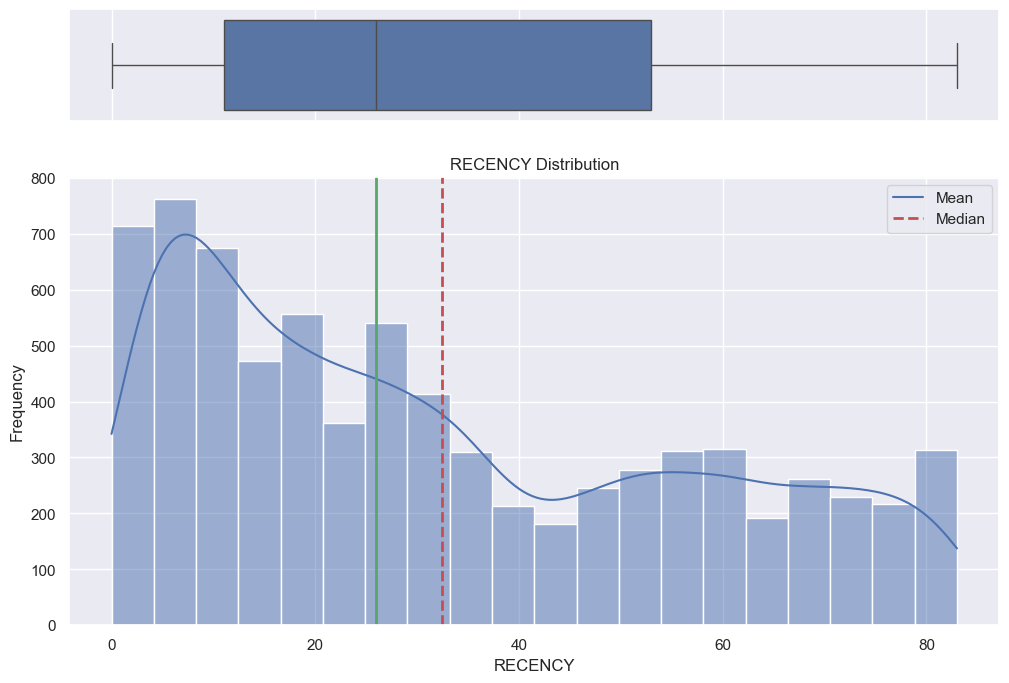

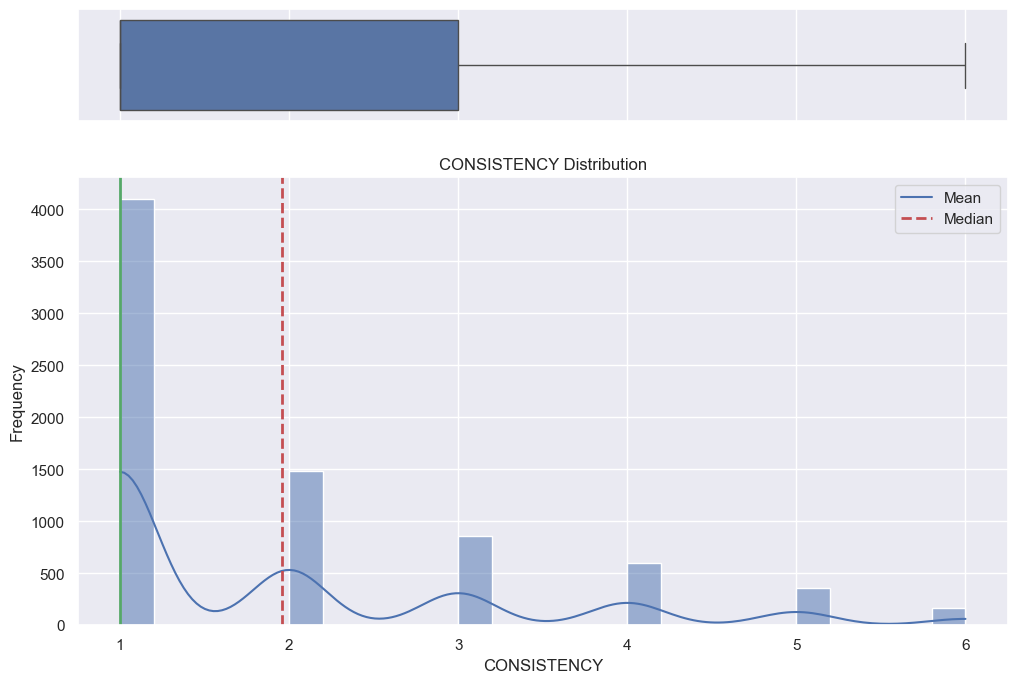

In [272]:
numerical_columns = ['CUMSALES', 'FREQUENCY', 'AVERAGE_TICKET', 'RECENCY', 'CONSISTENCY']

# Plot numerical variables
for column in numerical_columns:
    plot_histogram_boxplot(clean_data, column)

## Scaling Features

It is time to scale the data by standardization. By keeping features on similar scales, consistency across models improves, especially for models like Logistic Regression, SVM, and Lasso, which are sensitive to feature magnitudes. Scaling the features is crucial before model fitting to ensure that features with higher magnitudes don't disproportionately influence the model, preventing skewed coefficient predictions. But, before this we shall check if it is better to divide age into bins or take it as a continuous variable by plotting bivariate plots that could drive this decision home.

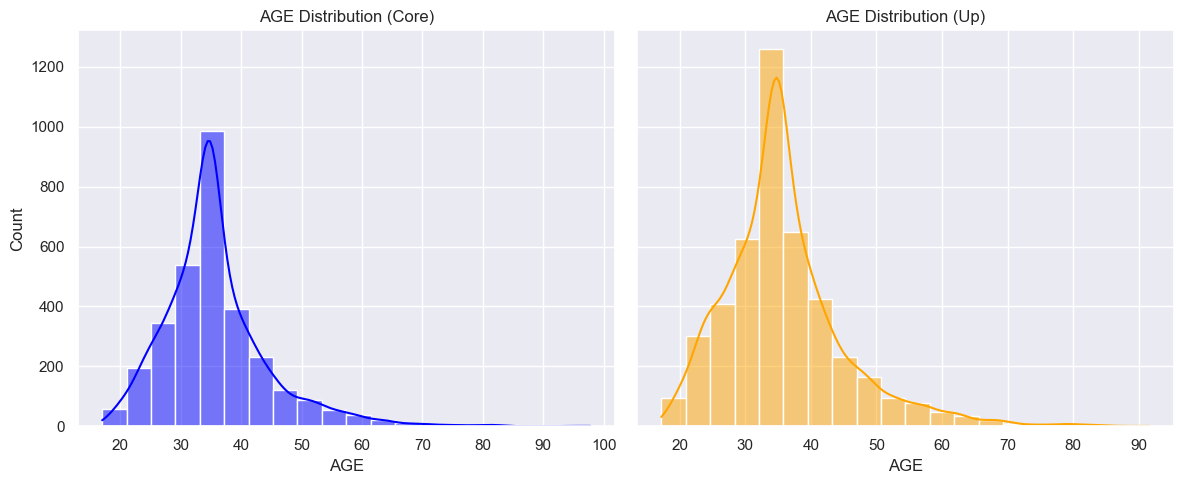

In [275]:
# Set up the figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot AGE distribution for 'Core' class
sns.histplot(clean_data[clean_data['SEGMENT_1'] == 'Core']['AGE'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('AGE Distribution (Core)')

# Plot AGE distribution for 'Up' class
sns.histplot(clean_data[clean_data['SEGMENT_1'] == 'Up']['AGE'], bins=20, kde=True, ax=axes[1], color='orange')
axes[1].set_title('AGE Distribution (Up)')

# Show the plots
plt.tight_layout()
plt.show()


Since the age distributions are similar for both Core and Up> Although, age of customers in Up class is higher at peak, but that is fine as the count of those customers is very less. So, overall binning isn't necessary. Keeping AGE continuous allows the model to pick up any subtle age-related differences, even though they aren't visually distinct.

In [277]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7561 entries, 1 to 9503
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUMSALES           7561 non-null   float64
 1   FREQUENCY          7561 non-null   int64  
 2   AVERAGE_TICKET     7561 non-null   float64
 3   RECENCY            7561 non-null   int64  
 4   CONSISTENCY        7561 non-null   int64  
 5   SEGMENT_1          7561 non-null   object 
 6   LOYALTY_GROUP      7561 non-null   object 
 7   PRICE_GROUP        7561 non-null   object 
 8   SEGMENT_2          7561 non-null   object 
 9   GENDER             7561 non-null   object 
 10  MARITAL_STATUS     7561 non-null   object 
 11  AGE                7561 non-null   float64
 12  MOSTUSED_PLATFORM  7561 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 827.0+ KB


In [278]:
from sklearn.preprocessing import StandardScaler

# Create a copy of your cleaned data before scaling
scaled_data = clean_data.copy()

# List of numerical features to scale (excluding 'AGE' if needed)
num_features = ['CUMSALES', 'FREQUENCY', 'AVERAGE_TICKET', 'RECENCY', 'CONSISTENCY']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the numerical features
scaled_data[num_features] = scaler.fit_transform(clean_data[num_features])

# Check the scaled data (optional)
scaled_data[num_features].describe().T

count          mean       std       min       25%       50%  \
CUMSALES        7561.0  5.638482e-17  1.000066 -0.995693 -0.707614 -0.346994   
FREQUENCY       7561.0  6.014381e-17  1.000066 -0.748322 -0.748322 -0.748322   
AVERAGE_TICKET  7561.0  7.517976e-18  1.000066 -1.543541 -0.798491 -0.189948   
RECENCY         7561.0 -9.303496e-17  1.000066 -1.330001 -0.878471 -0.262749   
CONSISTENCY     7561.0  6.014381e-17  1.000066 -0.724761 -0.724761 -0.724761   

                     75%       max  
CUMSALES        0.324629  4.344515  
FREQUENCY       0.655490  2.761207  
AVERAGE_TICKET  0.621031  3.122194  
RECENCY         0.845550  2.076995  
CONSISTENCY     0.786315  3.052928

Now, time for looking for bivariate relationships between features, as target is already a factor variable.

In [280]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7561 entries, 1 to 9503
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUMSALES           7561 non-null   float64
 1   FREQUENCY          7561 non-null   float64
 2   AVERAGE_TICKET     7561 non-null   float64
 3   RECENCY            7561 non-null   float64
 4   CONSISTENCY        7561 non-null   float64
 5   SEGMENT_1          7561 non-null   object 
 6   LOYALTY_GROUP      7561 non-null   object 
 7   PRICE_GROUP        7561 non-null   object 
 8   SEGMENT_2          7561 non-null   object 
 9   GENDER             7561 non-null   object 
 10  MARITAL_STATUS     7561 non-null   object 
 11  AGE                7561 non-null   float64
 12  MOSTUSED_PLATFORM  7561 non-null   object 
dtypes: float64(6), object(7)
memory usage: 827.0+ KB


## Bivariate Visuals

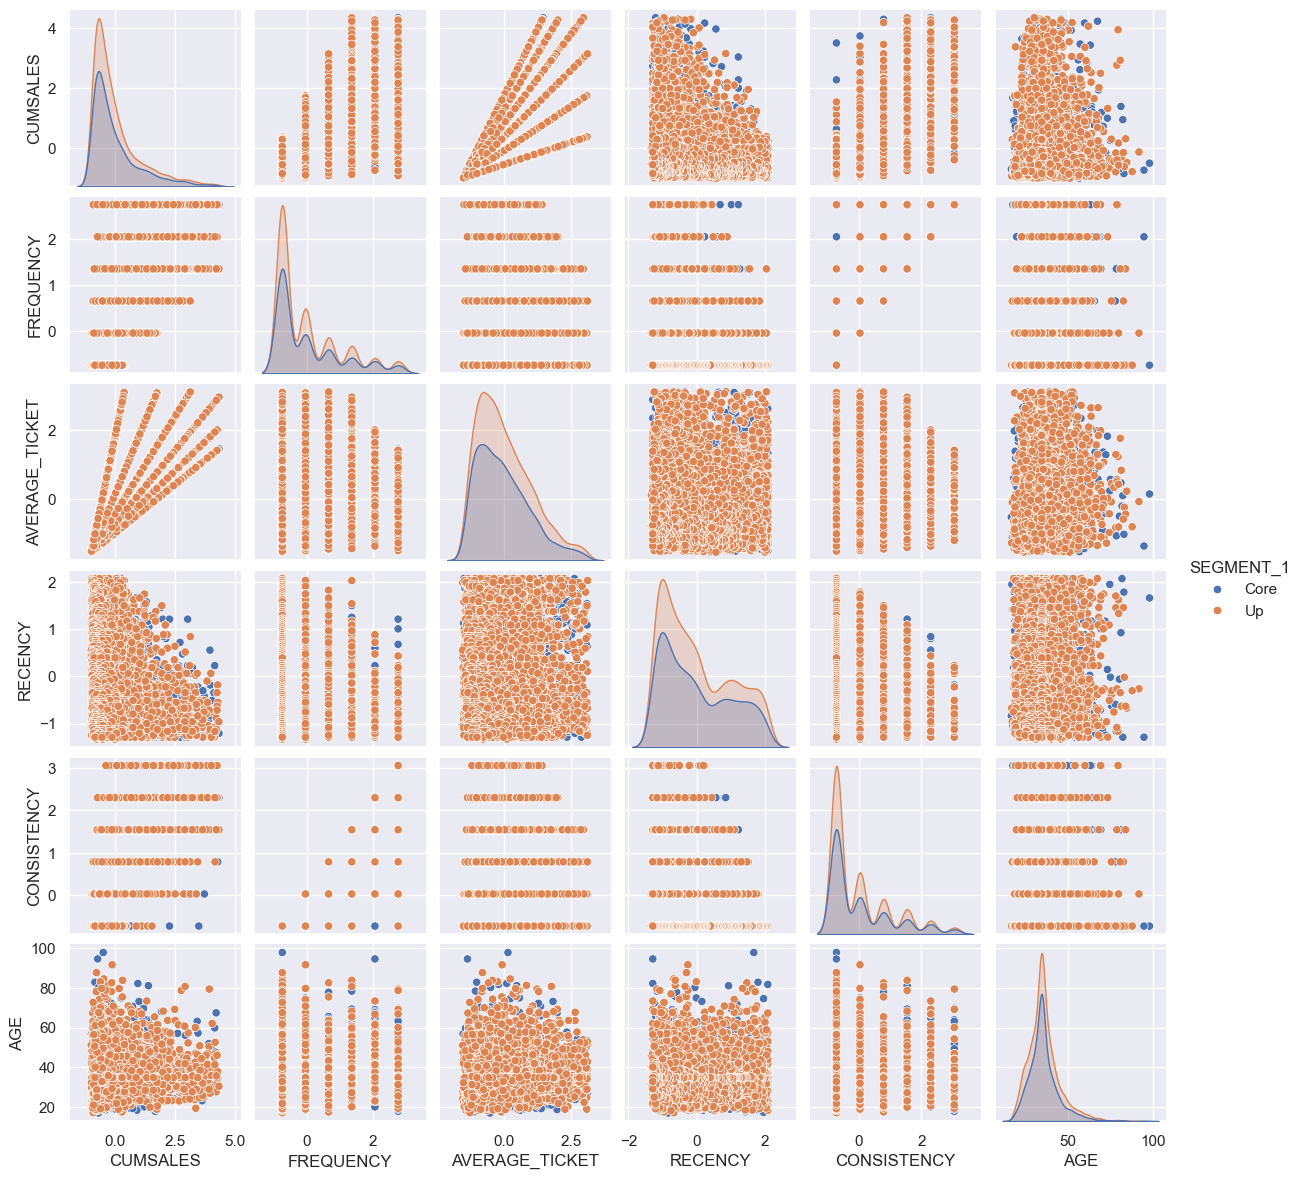

In [282]:
# Pair plot with 'SEGMENT_1' as the hue (color-coded by target class)
sns.pairplot(scaled_data, hue='SEGMENT_1', diag_kind='kde', height=2)
plt.show()

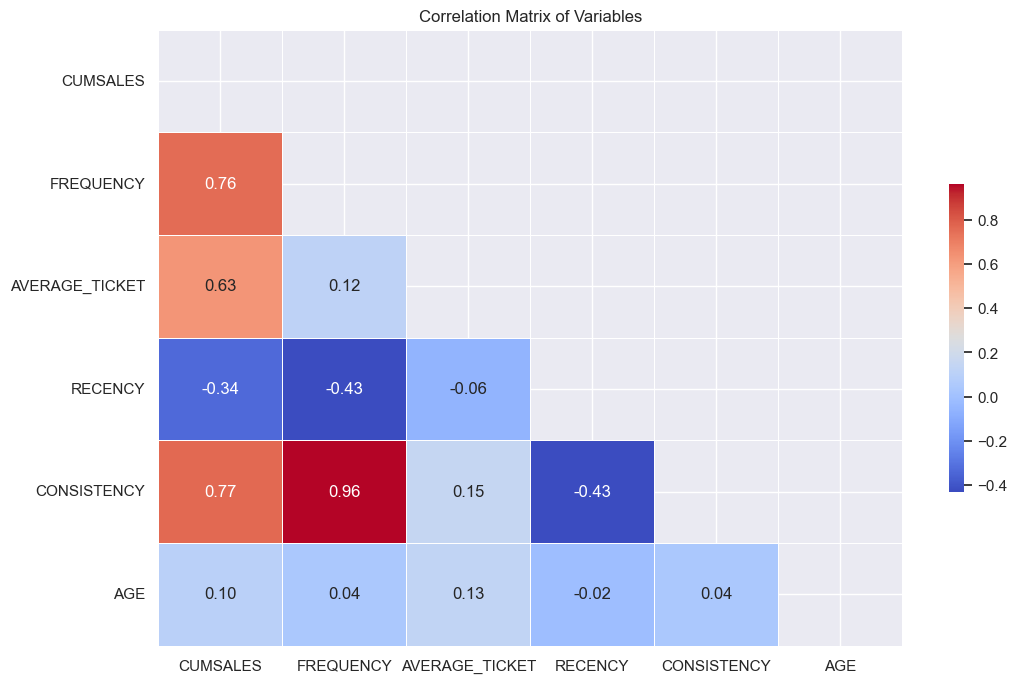

In [283]:
# Correlation matrix to understand relationships
correlation_matrix = scaled_data.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Variables')
plt.show()

There are high correlations especially between Consistency and Frequency (0.96), Frequency and Cumsales (0.76), and moderate correlations exist as well. Point to be remembered.

In [285]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7561 entries, 1 to 9503
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUMSALES           7561 non-null   float64
 1   FREQUENCY          7561 non-null   float64
 2   AVERAGE_TICKET     7561 non-null   float64
 3   RECENCY            7561 non-null   float64
 4   CONSISTENCY        7561 non-null   float64
 5   SEGMENT_1          7561 non-null   object 
 6   LOYALTY_GROUP      7561 non-null   object 
 7   PRICE_GROUP        7561 non-null   object 
 8   SEGMENT_2          7561 non-null   object 
 9   GENDER             7561 non-null   object 
 10  MARITAL_STATUS     7561 non-null   object 
 11  AGE                7561 non-null   float64
 12  MOSTUSED_PLATFORM  7561 non-null   object 
dtypes: float64(6), object(7)
memory usage: 827.0+ KB


## One-hot Encoding
One-hot encoding is necessary to convert categorical variables into a numeric format that models can process. For linear models (Logistic Regression, Lasso), drop_first=True avoids multicollinearity by removing one category. For non-linear models (Random Forest, XGBoost, SVM), drop_first=False is used to retain all categories, as multicollinearity is not an issue.

In [287]:
# Label encode the target variable 'SEGMENT_1'
le = LabelEncoder()
scaled_data['SEGMENT_1'] = le.fit_transform(scaled_data['SEGMENT_1'])

# List of categorical columns to one-hot encode (other features)
oneHotCols = ['LOYALTY_GROUP', 'PRICE_GROUP', 'SEGMENT_2', 'GENDER', 'MARITAL_STATUS', 'MOSTUSED_PLATFORM']

# One-hot encode the categorical features and replace True/False with 1/0
model_data = pd.get_dummies(scaled_data, columns=oneHotCols).replace({True: 1, False: 0})

In [288]:
# Print the class assignment for SEGMENT_1
print(f"Class mapping for 'SEGMENT_1': {le.classes_[0]} -> 0, {le.classes_[1]} -> 1")

Class mapping for 'SEGMENT_1': Core -> 0, Up -> 1


In [289]:
#check linear model data

model_data.head()

CUMSALES  FREQUENCY  AVERAGE_TICKET   RECENCY  CONSISTENCY  SEGMENT_1  \
1 -0.541602  -0.748322       -0.009761  0.681358    -0.724761          0   
2 -0.162795  -0.046416       -0.139138  1.707561    -0.724761          0   
3  1.400982   0.655490        1.151894 -0.344846     0.030777          0   
5  0.494357   2.059301       -0.540529 -0.960568     2.297391          0   
6 -0.801804  -0.748322       -0.888646 -1.083712    -0.724761          0   

         AGE  LOYALTY_GROUP_Loyal  LOYALTY_GROUP_Ocasional  \
1  30.112329                    0                        1   
2  41.391781                    0                        1   
3  31.043836                    0                        1   
5  58.586301                    0                        1   
6  60.572603                    0                        1   

   LOYALTY_GROUP_Split  LOYALTY_GROUP_Vip  \
1                    0                  0   
2                    0                  0   
3                    0                  0   
5                    0                  0   
6                    0                  0   

   PRICE_GROUP_Moderately Price Insensitive  \
1                                         0   
2                                         0   
3                                         0   
5                                         0   
6                                         0   

   PRICE_GROUP_Moderately Price Sensitive  \
1                                       0   
2                                       0   
3                                       1   
5                                       0   
6                                       1   

   PRICE_GROUP_Selective Price Sensitive  PRICE_GROUP_Very Price Insensitive  \
1                                      1                                   0   
2                                      0                                   0   
3                                      0                                   0   
5                                      0                                   1   
6                                      0                                   0   

   PRICE_GROUP_Very Price Sensitive  SEGMENT_2_A  SEGMENT_2_AA  SEGMENT_2_AA-  \
1                                 0            0             0              0   
2                                 1            0             0              0   
3                                 0            0             0              0   
5                                 0            0             0              0   
6                                 0            0             0              0   

   SEGMENT_2_B  SEGMENT_2_B BAJIO  SEGMENT_2_B FRONTERA  GENDER_Female  \
1            1                  0                     0              1   
2            1                  0                     0              1   
3            1                  0                     0              0   
5            0                  0                     1              1   
6            1                  0                     0              0   

   GENDER_Male  MARITAL_STATUS_Divorced  MARITAL_STATUS_Married  \
1            0                        0                       1   
2            0                        0                       1   
3            1                        0                       1   
5            0                        0                       0   
6            1                        0                       1   

   MARITAL_STATUS_Single  MOSTUSED_PLATFORM_Mobile  MOSTUSED_PLATFORM_Web  
1                      0                         0                      1  
2                      0                         1                      0  
3                      0                         1                      0  
5                      1                         0                      1  
6                      0                         0                      1

## Class Imbalance in Target

Let's check the class imbalance in the target variable one last time as we near model fitting.

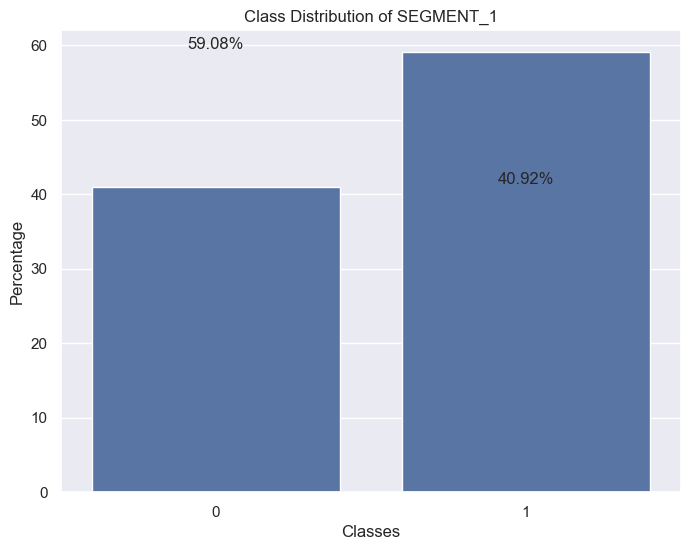

In [292]:
# Check the class balance of the target variable 'SEGMENT_1'
class_counts = scaled_data['SEGMENT_1'].value_counts(normalize=True) * 100

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)

# Add percentage labels to each bar
for index, value in enumerate(class_counts.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')

# Title and labels
plt.title('Class Distribution of SEGMENT_1')
plt.ylabel('Percentage')
plt.xlabel('Classes')
plt.show()


60/40 split is good enough class balance in the target variable (Segment_1). We can proceed with next steps.

## Train-Test Split

Time to split train and test data. i choose a good enough 20% of data to testing keeping other part for training because of a good number of data available (7.5K observations total).

In [296]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7561 entries, 1 to 9503
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CUMSALES                                  7561 non-null   float64
 1   FREQUENCY                                 7561 non-null   float64
 2   AVERAGE_TICKET                            7561 non-null   float64
 3   RECENCY                                   7561 non-null   float64
 4   CONSISTENCY                               7561 non-null   float64
 5   SEGMENT_1                                 7561 non-null   int32  
 6   AGE                                       7561 non-null   float64
 7   LOYALTY_GROUP_Loyal                       7561 non-null   int64  
 8   LOYALTY_GROUP_Ocasional                   7561 non-null   int64  
 9   LOYALTY_GROUP_Split                       7561 non-null   int64  
 10  LOYALTY_GROUP_Vip                        

## Important Note
As I went on to build and evaluate logistic regression model with the above shown features, it was found out that segment_2 is very highly correlated to target feature-segment_1. This had resulted in perfect model of 100% in all classification metrics- accuracy, recall, precision, F-1 score. This is good as a model, but for learning purposes, this Segment_2 feature was dropped and all the following models are built with the remaining features.

In [298]:
#drop Segment_2 due to its very high influence on taret which is good for model, but not to me as a learner with a model that gives 100% accuracy.
model_data= model_data.drop(columns=[col for col in model_data.columns if 'SEGMENT_2' in col])

In [299]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7561 entries, 1 to 9503
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CUMSALES                                  7561 non-null   float64
 1   FREQUENCY                                 7561 non-null   float64
 2   AVERAGE_TICKET                            7561 non-null   float64
 3   RECENCY                                   7561 non-null   float64
 4   CONSISTENCY                               7561 non-null   float64
 5   SEGMENT_1                                 7561 non-null   int32  
 6   AGE                                       7561 non-null   float64
 7   LOYALTY_GROUP_Loyal                       7561 non-null   int64  
 8   LOYALTY_GROUP_Ocasional                   7561 non-null   int64  
 9   LOYALTY_GROUP_Split                       7561 non-null   int64  
 10  LOYALTY_GROUP_Vip                        

In [300]:
from sklearn.model_selection import train_test_split

# Linear model dataset
x = model_data.drop('SEGMENT_1', axis=1)  # Predictor columns
y = model_data['SEGMENT_1']               # Target variable

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# 3- Building Predictive Models



#### Key Note
As we go ahead with model building by fine tuning hyparameters to make as a better model as possible, we use K-fold Cross-validation at 2 places- during hyperparameter tuning and final model evaluation for all the models. This CV is not being used to evaluate the base models in each model fitting due to computational limits and time constraints, but only after that to find optimal parameters during tuning and final model evaluation. To bring all the model performance metrics onto the same page inorder to make a valid comparison, random_seed= 1 is set across all models.

In [303]:
#Import necessary libraries for model building and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## 3.1 Parametric Models   

### 3.1.1 Logistic Regression

In [306]:
x.head()

CUMSALES  FREQUENCY  AVERAGE_TICKET   RECENCY  CONSISTENCY        AGE  \
1 -0.541602  -0.748322       -0.009761  0.681358    -0.724761  30.112329   
2 -0.162795  -0.046416       -0.139138  1.707561    -0.724761  41.391781   
3  1.400982   0.655490        1.151894 -0.344846     0.030777  31.043836   
5  0.494357   2.059301       -0.540529 -0.960568     2.297391  58.586301   
6 -0.801804  -0.748322       -0.888646 -1.083712    -0.724761  60.572603   

   LOYALTY_GROUP_Loyal  LOYALTY_GROUP_Ocasional  LOYALTY_GROUP_Split  \
1                    0                        1                    0   
2                    0                        1                    0   
3                    0                        1                    0   
5                    0                        1                    0   
6                    0                        1                    0   

   LOYALTY_GROUP_Vip  PRICE_GROUP_Moderately Price Insensitive  \
1                  0                                         0   
2                  0                                         0   
3                  0                                         0   
5                  0                                         0   
6                  0                                         0   

   PRICE_GROUP_Moderately Price Sensitive  \
1                                       0   
2                                       0   
3                                       1   
5                                       0   
6                                       1   

   PRICE_GROUP_Selective Price Sensitive  PRICE_GROUP_Very Price Insensitive  \
1                                      1                                   0   
2                                      0                                   0   
3                                      0                                   0   
5                                      0                                   1   
6                                      0                                   0   

   PRICE_GROUP_Very Price Sensitive  GENDER_Female  GENDER_Male  \
1                                 0              1            0   
2                                 1              1            0   
3                                 0              0            1   
5                                 0              1            0   
6                                 0              0            1   

   MARITAL_STATUS_Divorced  MARITAL_STATUS_Married  MARITAL_STATUS_Single  \
1                        0                       1                      0   
2                        0                       1                      0   
3                        0                       1                      0   
5                        0                       0                      1   
6                        0                       1                      0   

   MOSTUSED_PLATFORM_Mobile  MOSTUSED_PLATFORM_Web  
1                         0                      1  
2                         1                      0  
3                         1                      0  
5                         0                      1  
6                         0                      1

In [307]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7561 entries, 1 to 9503
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CUMSALES                                  7561 non-null   float64
 1   FREQUENCY                                 7561 non-null   float64
 2   AVERAGE_TICKET                            7561 non-null   float64
 3   RECENCY                                   7561 non-null   float64
 4   CONSISTENCY                               7561 non-null   float64
 5   AGE                                       7561 non-null   float64
 6   LOYALTY_GROUP_Loyal                       7561 non-null   int64  
 7   LOYALTY_GROUP_Ocasional                   7561 non-null   int64  
 8   LOYALTY_GROUP_Split                       7561 non-null   int64  
 9   LOYALTY_GROUP_Vip                         7561 non-null   int64  
 10  PRICE_GROUP_Moderately Price Insensitive 

In [308]:
y

1       0
2       0
3       0
5       0
6       0
       ..
9499    1
9500    1
9501    1
9502    1
9503    1
Name: SEGMENT_1, Length: 7561, dtype: int32

In [309]:
# Let's check the split of the data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(model_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(model_data.index)) * 100))

79.99% data is in training set
20.01% data is in test set


#### Baseline Model Fit

In [311]:
# Initialize the Logistic Regression model with the solver and random_state
logreg_model = LogisticRegression(solver="liblinear", random_state=1)

# Fit the model on the training data
logreg_model.fit(x_train, y_train)

# Predict on the test set
y_predict_logreg = logreg_model.predict(x_test)

#### Baseline Model Results

In [313]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Define a function to compute different metrics for classification models with model-specific names
def model_performance_classification_sklearn_with_threshold(model_name, model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance.

    model_name: string, name of the model for identification
    model: classifier model
    predictors: independent variables (features)
    target: dependent variable (target)
    threshold: threshold for classifying the observation as class 1
    """

    # Check if the model has predict_proba method
    if hasattr(model, "predict_proba"):
        pred_prob = model.predict_proba(predictors)[:, 1]
        pred = np.where(pred_prob > threshold, 1, 0)
    else:
        # For models without predict_proba, use predict directly
        pred = model.predict(predictors)

    # Calculate metrics
    acc = accuracy_score(target, pred)  # Accuracy
    recall = recall_score(target, pred)  # Recall
    precision = precision_score(target, pred, zero_division=0)  # Precision
    f1 = f1_score(target, pred)  # F1 Score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Model": [model_name],
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1 Score": [f1]
        }
    )

    return df_perf

In [314]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_with_counts_and_percentage(model, predictors, target, threshold=0.5):
    """
    Function to compute and plot the confusion matrix for a classification model with both counts and percentages.

    model: classifier
    predictors: independent variables (features)
    target: dependent variable (actual labels)
    threshold: threshold for classifying the observation as class 1
    """
    # Check if the model has predict_proba method
    if hasattr(model, "predict_proba"):
        pred_prob = model.predict_proba(predictors)[:, 1]
        pred = np.where(pred_prob > threshold, model.classes_[1], model.classes_[0])
    else:
        # For models without predict_proba, use predict directly
        pred = model.predict(predictors)

    # Compute confusion matrix
    cm = confusion_matrix(target, pred, labels=model.classes_)

    # Compute percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create an annotation matrix with counts and percentages
    annot = np.empty_like(cm).astype(str)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            annot[i, j] = f'{cm[i, j]}\n{cm_percent[i, j]:.2f}%'

    # Plotting the confusion matrix with annotations for both counts and percentages
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=annot, fmt='', cmap='RdPu', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix with Counts and Percentages')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    return cm

Class mapping for 'SEGMENT_1': Core -> 0, Up -> 1


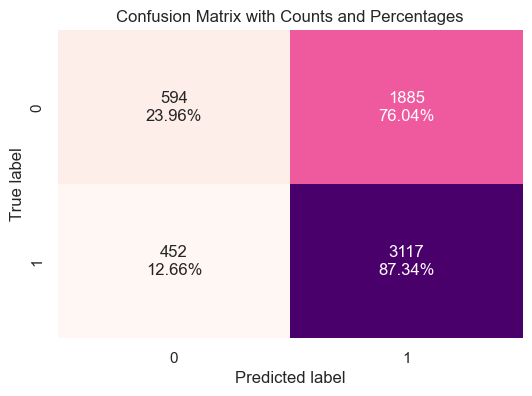

array([[ 594, 1885],
       [ 452, 3117]], dtype=int64)

In [315]:
# Print the class assignment for SEGMENT_1
print(f"Class mapping for 'SEGMENT_1': {le.classes_[0]} -> 0, {le.classes_[1]} -> 1")

# Confusion matrix for the training set
confusion_matrix_with_counts_and_percentage(logreg_model, x_train, y_train)

In [316]:
# Now we calculate measures of fit for the training set
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold('Logistic Regression',logreg_model, x_train, y_train)

# Calculating performance in the test set
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold('Logistic Regression',logreg_model, x_test, y_test)

# Combine both into a single table for comparison
log_reg_combined_perf = pd.concat([log_reg_model_train_perf, log_reg_model_test_perf], axis=0)
log_reg_combined_perf.index = ['Train', 'Test']  # Set index labels for clarity

# Display the combined performance table
print("Logistic Regression Training and Test Performance:")
log_reg_combined_perf.T

Logistic Regression Training and Test Performance:


Train                 Test
Model      Logistic Regression  Logistic Regression
Accuracy              0.613591             0.614012
Recall                0.873354             0.868597
Precision             0.623151             0.626003
F1 Score              0.727336             0.727612

display of coefficients alongside their corresponding variables.

In [318]:
# Create a DataFrame with coefficients and feature names
coef_df_logreg = pd.DataFrame(logreg_model.coef_.T, index=x_train.columns, columns=['Coefficient'])

# Add the intercept to the DataFrame
coef_df_logreg.loc['Intercept'] = logreg_model.intercept_

# Sort coefficients in descending order
coef_df_logreg = coef_df_logreg.sort_values(by='Coefficient', ascending=False)

# Display the coefficients DataFrame
print("Coefficients and Intercept:")
coef_df_logreg

Coefficients and Intercept:


Coefficient
LOYALTY_GROUP_Vip                            2.023967
LOYALTY_GROUP_Loyal                          1.041891
Intercept                                    0.427908
AVERAGE_TICKET                               0.405313
MOSTUSED_PLATFORM_Web                        0.403017
GENDER_Female                                0.274189
PRICE_GROUP_Selective Price Sensitive        0.267920
MARITAL_STATUS_Single                        0.225697
PRICE_GROUP_Moderately Price Insensitive     0.186817
FREQUENCY                                    0.165315
GENDER_Male                                  0.153719
MARITAL_STATUS_Married                       0.115151
MARITAL_STATUS_Divorced                      0.087060
MOSTUSED_PLATFORM_Mobile                     0.024891
PRICE_GROUP_Moderately Price Sensitive       0.011674
AGE                                          0.005740
PRICE_GROUP_Very Price Insensitive          -0.004595
CONSISTENCY                                 -0.020389
RECENCY                                     -0.028012
PRICE_GROUP_Very Price Sensitive            -0.033908
CUMSALES                                    -0.893037
LOYALTY_GROUP_Ocasional                     -1.200087
LOYALTY_GROUP_Split                         -1.437863

#### Cross-Validation Results
With a slight class imbalance in the target variable- segment_1(60-40), a stratified K-fold does a good job at maintaining balanced proportions in each split.

In [320]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold

# Deploying Stratified K-fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Get cross-validated predictions for the entire dataset
y_pred_cv_logreg = cross_val_predict(logreg_model, x, y, cv=skf)

# Calculate metrics using the cross-validated predictions
accuracy_cv_logreg = accuracy_score(y, y_pred_cv_logreg)
precision_cv_logreg = precision_score(y, y_pred_cv_logreg)
recall_cv_logreg = recall_score(y, y_pred_cv_logreg)
f1_cv_logreg = f1_score(y, y_pred_cv_logreg)

# Creating a summary table for the CV results specific to Logistic Regression
logreg_cv_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Cross-Validated Score': [accuracy_cv_logreg, precision_cv_logreg, recall_cv_logreg, f1_cv_logreg]
})

# Display the metrics summary after cross-validation
print("Cross-Validation Performance for Logistic Regression:")
logreg_cv_metrics

Cross-Validation Performance for Logistic Regression:


Metric  Cross-Validated Score
0   Accuracy               0.613279
1  Precision               0.621324
2     Recall               0.884486
3   F1 Score               0.729909

#### Confusion Matrix

Class mapping for 'SEGMENT_1': Core -> 0, Up -> 1


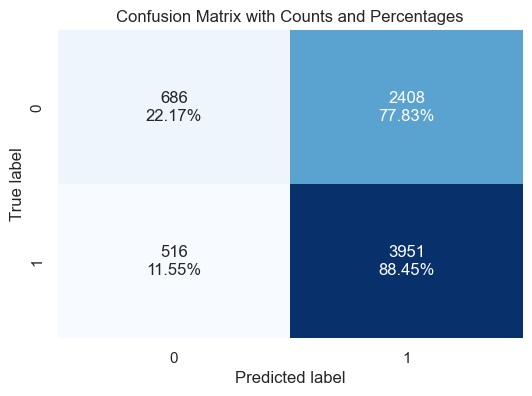

array([[ 686, 2408],
       [ 516, 3951]], dtype=int64)

In [322]:
#creating function that charts confusion matrix for CV results
def confusion_matrix_with_cv_predictions(y_true, y_pred, labels):
    """
    Function to compute and plot the confusion matrix with both counts and percentages using precomputed predictions.

    y_true: actual labels
    y_pred: predicted labels
    labels: model classes or label names
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Compute percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create an annotation matrix with counts and percentages
    annot = np.empty_like(cm).astype(str)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            annot[i, j] = f'{cm[i, j]}\n{cm_percent[i, j]:.2f}%'

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix with Counts and Percentages')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    return cm  # Return the confusion matrix for further analysis if needed

# Print the class assignment for SEGMENT_1
print(f"Class mapping for 'SEGMENT_1': {le.classes_[0]} -> 0, {le.classes_[1]} -> 1")

# Plot confusion matrix for CV predictions
confusion_matrix_with_cv_predictions(y, y_pred_cv_logreg, labels=logreg_model.classes_)


### 3.1.2 Lasso
To avoid not so useful steps, we jump straight into finding the optimal value for C (inverse alpha for logreg specific) for our Lasso model to build best lasso model directly.

#### Hyperparameter Tuning

Best C for Logistic Regression with Lasso: 0.0869 with Accuracy: 0.6176


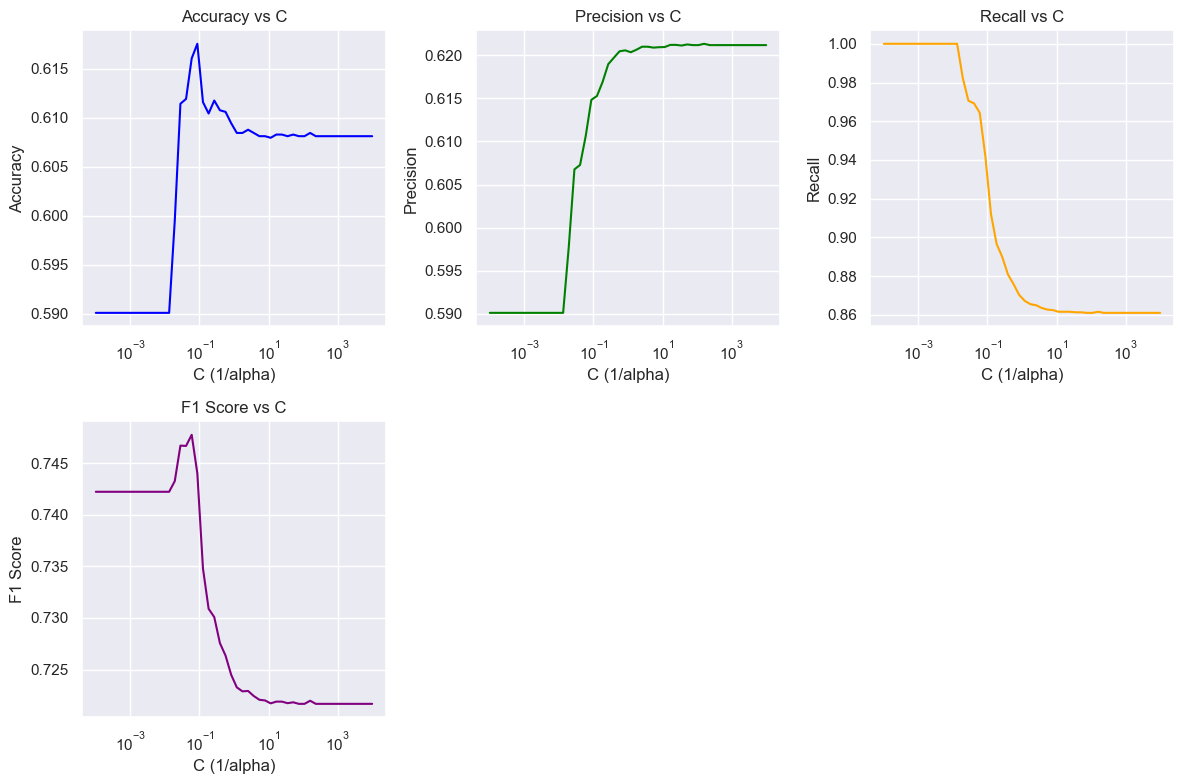

In [325]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a range of C values (inverse of alpha in Logistic Regression)
C_values = np.logspace(-4, 4, 50)  # Similar to alpha, where C is 1/alpha

# Initialize variables to store the best scores and corresponding C
best_accuracy = 0
best_C = None

# Lists to store metrics for each C value
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

# Perform cross-validation with StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Iterate over the C values (regularization strengths)
for C in C_values:
    logreg_lasso = LogisticRegression(penalty='l1', solver='liblinear', C=C, random_state=1)  # Logistic Regression with L1 regularization

    # Cross-validate the model
    cv_accuracy_scores = cross_val_score(logreg_lasso, x_train, y_train, cv=skf, scoring='accuracy')
    cv_precision_scores = cross_val_score(logreg_lasso, x_train, y_train, cv=skf, scoring='precision')
    cv_recall_scores = cross_val_score(logreg_lasso, x_train, y_train, cv=skf, scoring='recall')
    cv_f1_scores = cross_val_score(logreg_lasso, x_train, y_train, cv=skf, scoring='f1')

    # Calculate average cross-validation score for each metric
    accuracy = np.mean(cv_accuracy_scores)
    precision = np.mean(cv_precision_scores)
    recall = np.mean(cv_recall_scores)
    f1 = np.mean(cv_f1_scores)

    # Store metrics for plotting
    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

    # Update the best score and C value based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C

# Print the best C value and corresponding accuracy
print(f"Best C for Logistic Regression with Lasso: {best_C:.4f} with Accuracy: {best_accuracy:.4f}")

# Plot the metrics against C values
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 3, 1)
plt.plot(C_values, accuracy_values, label='Accuracy', color='blue')
plt.xscale('log')
plt.xlabel('C (1/alpha)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C')

# Precision plot
plt.subplot(2, 3, 2)
plt.plot(C_values, precision_values, label='Precision', color='green')
plt.xscale('log')
plt.xlabel('C (1/alpha)')
plt.ylabel('Precision')
plt.title('Precision vs C')

# Recall plot
plt.subplot(2, 3, 3)
plt.plot(C_values, recall_values, label='Recall', color='orange')
plt.xscale('log')
plt.xlabel('C (1/alpha)')
plt.ylabel('Recall')
plt.title('Recall vs C')

# F1 Score plot
plt.subplot(2, 3, 4)
plt.plot(C_values, f1_values, label='F1 Score', color='purple')
plt.xscale('log')
plt.xlabel('C (1/alpha)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs C')

plt.tight_layout()
plt.show()

#### Optimal Model Fit

#### Classification Metrics

In [328]:
# Refit the Logistic Regression model using the best C value found
final_logreg_lasso = LogisticRegression(penalty='l1', solver='liblinear', C=best_C, random_state=1)
final_logreg_lasso.fit(x_train, y_train)

# Make predictions on both the train and test sets
y_pred_train = final_logreg_lasso.predict(x_train)
y_pred_test = final_logreg_lasso.predict(x_test)

# Evaluate metrics on the train and test sets
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, zero_division=0)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, zero_division=0)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Creating a DataFrame for Train and Test metrics
lasso_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Lasso Train': [accuracy_train, precision_train, recall_train, f1_train],
    'Lasso Test': [accuracy_test, precision_test, recall_test, f1_test]
})

# Display the DataFrame with the performance metrics
print("Final Performance Metrics of Lasso after Tuning:")
lasso_metrics_df

Final Performance Metrics of Lasso after Tuning:


Metric  Lasso Train  Lasso Test
0   Accuracy     0.615906    0.619960
1  Precision     0.616145    0.621337
2     Recall     0.926030    0.920935
3   F1 Score     0.739953    0.742037

#### Feature Importance

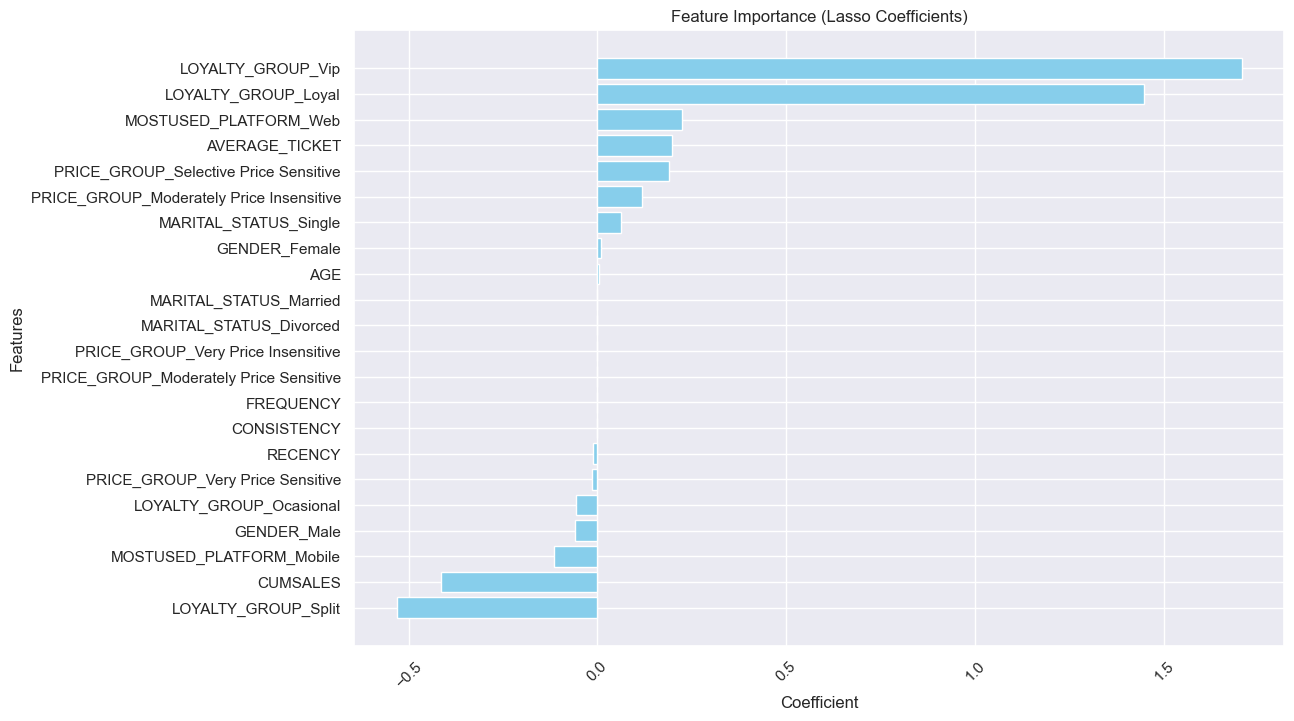

Feature Importance (Lasso Coefficients):


Feature  Coefficient
0                          LOYALTY_GROUP_Vip     1.707078
1                        LOYALTY_GROUP_Loyal     1.447627
2                      MOSTUSED_PLATFORM_Web     0.223292
3                             AVERAGE_TICKET     0.198282
4      PRICE_GROUP_Selective Price Sensitive     0.189601
5   PRICE_GROUP_Moderately Price Insensitive     0.118102
6                      MARITAL_STATUS_Single     0.062679
7                              GENDER_Female     0.010468
8                                        AGE     0.004434
9                     MARITAL_STATUS_Married     0.000000
10                   MARITAL_STATUS_Divorced     0.000000
11        PRICE_GROUP_Very Price Insensitive     0.000000
12    PRICE_GROUP_Moderately Price Sensitive     0.000000
13                                 FREQUENCY     0.000000
14                               CONSISTENCY     0.000000
15                                   RECENCY    -0.012256
16          PRICE_GROUP_Very Price Sensitive    -0.015556
17                   LOYALTY_GROUP_Ocasional    -0.057158
18                               GENDER_Male    -0.059553
19                  MOSTUSED_PLATFORM_Mobile    -0.114957
20                                  CUMSALES    -0.413820
21                       LOYALTY_GROUP_Split    -0.532009

In [330]:
# Retrieve the coefficients from the final Lasso model
lasso_coefficients = final_logreg_lasso.coef_[0]

# Create a DataFrame to display the coefficients alongside their corresponding feature names
lasso_coefficients_df = pd.DataFrame({
    'Feature': x_train.columns,  # Feature names
    'Coefficient': lasso_coefficients  # Lasso coefficients
})

# Sort the DataFrame based on Lasso coefficients for better clarity
lasso_coefficients_df = lasso_coefficients_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

# Plot the feature importance (coefficients)
plt.figure(figsize=(12, 8))  # Adjusting the size to accommodate many features
bars = plt.barh(lasso_coefficients_df['Feature'], lasso_coefficients_df['Coefficient'], color='skyblue')

# Make the plot scrollable by rotating labels and adjusting limits
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Feature Importance (Lasso Coefficients)')
plt.xticks(rotation=45)

# Display a horizontal scrollable plot by adjusting figsize width and label size
plt.show()

# Display the coefficients in a table
print("Feature Importance (Lasso Coefficients):")
lasso_coefficients_df



#### Confusion Matrix

Class mapping for 'SEGMENT_1': Core -> 0, Up -> 1


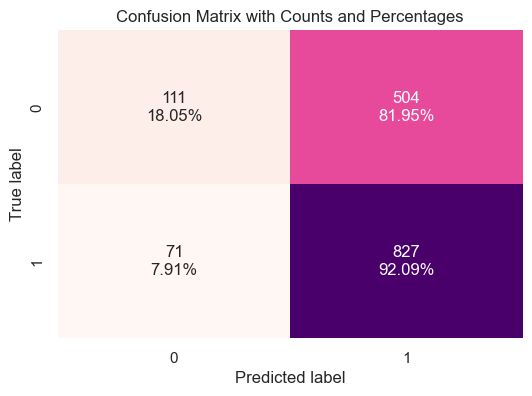

array([[111, 504],
       [ 71, 827]], dtype=int64)

In [332]:
# Print the class assignment for SEGMENT_1
print(f"Class mapping for 'SEGMENT_1': {le.classes_[0]} -> 0, {le.classes_[1]} -> 1")

# Confusion matrix for the test set
confusion_matrix_with_counts_and_percentage(final_logreg_lasso, x_test, y_test)

## 3.2 Non-Parametric Models

### 3.2.1 Random Forest

#### Baseline Model Fit
First, let's create a base model with 'n_estimators' set to 10, without specifying any other parameters.

In [336]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create a classifier object (instead of regressor)
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=1)  # Specify 10 trees

# Fit the classifier with the training data
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [337]:
# We have created the model "rf_classifier", and it has been trained
# Let's see the specifications of the model created:
params_rf_classifier = rf_classifier.get_params()
print(params_rf_classifier)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


Note that if we print params_rf_regressor (the variable containing the model's 'specifications'), we can see that MSE is the error criterion used, and the bootstrap option is set to TRUE. Additionally, there is no indication of the tree's depth or other parameters. Let's examine the results:

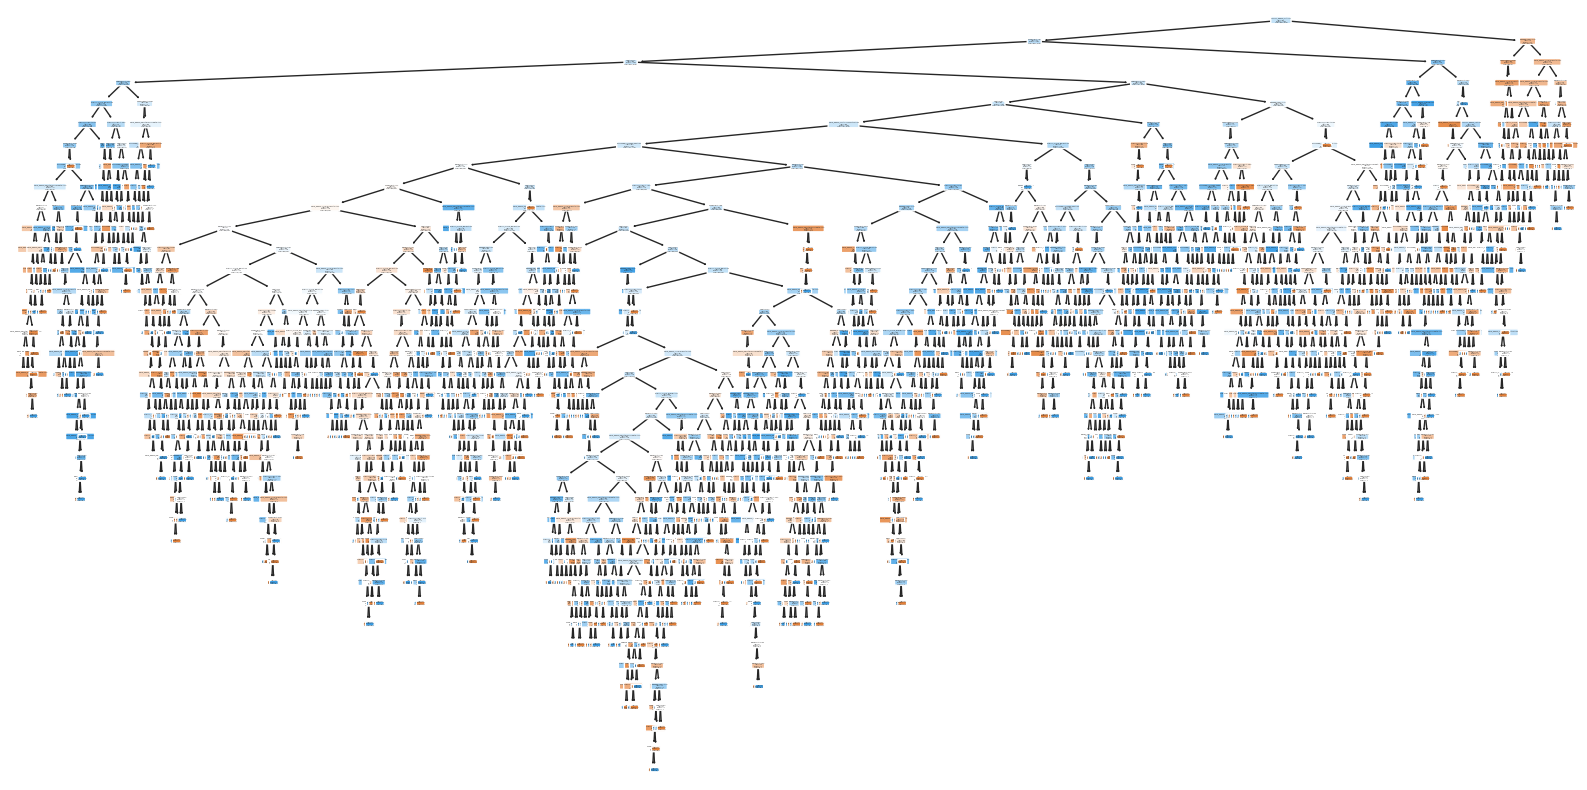

In [339]:
# Import necessary library for tree plotting
from sklearn.tree import plot_tree

# Choose one of the trees from the "Forest"
tree = rf_classifier.estimators_[1]  # Randomly picking the 2nd tree in the forest

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=x_train.columns, rounded=True)
plt.savefig('decision_tree.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

Examining a single tree in the 'forest' reveals a high level of complexity.

#### Baseline Model Results

In [342]:
# Make predictions on the training data
y_train_rf_base_pred = rf_classifier.predict(x_train)

# Calculate accuracy, precision, recall, F1-score for the training data
accuracy_train_rf_base = accuracy_score(y_train, y_train_rf_base_pred)
precision_train_rf_base = precision_score(y_train, y_train_rf_base_pred, average='binary', zero_division=0)
recall_train_rf_base = recall_score(y_train, y_train_rf_base_pred, average='binary')
f1_train_rf_base = f1_score(y_train, y_train_rf_base_pred, average='binary')

# Make predictions using the model on the test data
y_test_rf_base_pred = rf_classifier.predict(x_test)

# Calculate accuracy, precision, recall, F1-score for the test data
accuracy_test_rf_base = accuracy_score(y_test, y_test_rf_base_pred)
precision_test_rf_base = precision_score(y_test, y_test_rf_base_pred, average='binary', zero_division=0)
recall_test_rf_base = recall_score(y_test, y_test_rf_base_pred, average='binary')
f1_test_rf_base = f1_score(y_test, y_test_rf_base_pred, average='binary')

# Create a summary table
metrics = {
    'Accuracy': {'Train': accuracy_train_rf_base, 'Test': accuracy_test_rf_base},
    'Precision': {'Train': precision_train_rf_base, 'Test': precision_test_rf_base},
    'Recall': {'Train': recall_train_rf_base, 'Test': recall_test_rf_base},
    'F1 Score': {'Train': f1_train_rf_base, 'Test': f1_test_rf_base}
}

# Create the DataFrame from the dictionary
metrics_rf_base_df = pd.DataFrame(metrics)
print('Results for Basic RF model')
metrics_rf_base_df.T

Results for Basic RF model


Train      Test
Accuracy   0.985946  0.603437
Precision  0.993205  0.670872
Recall     0.982908  0.651448
F1 Score   0.988030  0.661017

#### Hyperparameter Tuning
The significant drop in test accuracy than tarin accuracy shows that the model was overfit. It is time to prune it.

 Let's develop a function to determine the optimal maximum tree depth, number of trees, and the best variable selection for splits, with the goal of minimizing the test MSE. The general range for max_depth and n_estimators is set and can be increased if those limits for both those parameters are touched. It is kind of dynamic tuning approach.

In [345]:
from sklearn.model_selection import cross_val_score

def find_optimal_rf_params_and_plot_cv(x_train, y_train, n_estimators_range, max_depth_range, cv=5):
    # Initialize variables to store the optimal parameters and results for plotting
    max_accuracy = 0
    best_n_estimators = None
    best_max_depth = None
    plot_data = []

    # Iterate over all combinations of n_estimators and max_depth
    for n_estimators in n_estimators_range:
        for max_depth in max_depth_range:
            # Create RandomForestClassifier model
            rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=1)

            # Perform cross-validation
            cv_scores = cross_val_score(rf, x_train, y_train, cv=cv, scoring='accuracy')

            # Calculate mean CV accuracy
            accuracy = cv_scores.mean()
            plot_data.append((n_estimators, max_depth, accuracy))

            # Update the optimal parameters if current accuracy is higher than max_accuracy
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                best_n_estimators = n_estimators
                best_max_depth = max_depth

    # Plotting the results
    plot_df = pd.DataFrame(plot_data, columns=['n_estimators', 'max_depth', 'Accuracy'])
    fig, ax = plt.subplots(figsize=(12, 6))
    for n_estimator in n_estimators_range:
        subset = plot_df[plot_df['n_estimators'] == n_estimator]
        ax.plot(subset['max_depth'], subset['Accuracy'], label=f'n_estimators={n_estimator}')

    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Cross-Validated Accuracy')
    ax.set_title('Evolution of Accuracy with Different n_estimators and max_depth (CV)')
    ax.legend()
    plt.show()

    return best_n_estimators, best_max_depth, max_accuracy

# Example usage with CV
n_estimators_range = range(1, 20)  # Define ranges for n_estimators and max_depth
max_depth_range = range(2, 20)

optimal_n_estimators, optimal_max_depth, optimal_accuracy = find_optimal_rf_params_and_plot_cv(
    x_train, y_train, n_estimators_range, max_depth_range, cv=5
)

print(f"Optimal n_estimators: {optimal_n_estimators}, Optimal max_depth: {optimal_max_depth}, Optimal Accuracy: {optimal_accuracy:.4f}")


Optimal n_estimators: 18, Optimal max_depth: 8, Optimal Accuracy: 0.6303


#### Optimal Model Fit
An optimal model, consisting of 18 trees with a maximum depth of 8 per tree, is identified for achieving the maximum accuracy. This suggests the inference of complex trees.

#### Classification Metrics

In [348]:
# Create the optimal RandomForestClassifier
optim_rf_classifier = RandomForestClassifier(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=1)

# Perform cross-validation to evaluate performance on the training data (using accuracy, precision, recall, F1 score)
cv_accuracy_scores = cross_val_score(optim_rf_classifier, x_train, y_train, cv=5, scoring='accuracy')
cv_precision_scores = cross_val_score(optim_rf_classifier, x_train, y_train, cv=5, scoring='precision')
cv_recall_scores = cross_val_score(optim_rf_classifier, x_train, y_train, cv=5, scoring='recall')
cv_f1_scores = cross_val_score(optim_rf_classifier, x_train, y_train, cv=5, scoring='f1')

# Calculate mean CV scores
cv_accuracy = cv_accuracy_scores.mean()
cv_precision = cv_precision_scores.mean()
cv_recall = cv_recall_scores.mean()
cv_f1 = cv_f1_scores.mean()

# Now, fit the model on the full training data
optim_rf_classifier.fit(x_train, y_train)

# Predict on the test data
y_test_rf_optim_pred = optim_rf_classifier.predict(x_test)

# Calculate test set metrics
accuracy_test_rf_optim = accuracy_score(y_test, y_test_rf_optim_pred)
precision_test_rf_optim = precision_score(y_test, y_test_rf_optim_pred, zero_division=0)
recall_test_rf_optim = recall_score(y_test, y_test_rf_optim_pred)
f1_test_rf_optim = f1_score(y_test, y_test_rf_optim_pred)

# Create a summary table for both cross-validated train metrics and test metrics
RF_metrics = {
    'Accuracy': {'Train': cv_accuracy, 'Test': accuracy_test_rf_optim},
    'Precision': {'Train': cv_precision, 'Test': precision_test_rf_optim},
    'Recall': {'Train': cv_recall, 'Test': recall_test_rf_optim},
    'F1 Score': {'Train': cv_f1, 'Test': f1_test_rf_optim}
}

# Create the DataFrame from the dictionary and transpose it for easier comparison
RF_metrics_df = pd.DataFrame(RF_metrics).T

# Display the final DataFrame with performance metrics
print("Performance of Optimal Random Forest Model:")
RF_metrics_df


Performance of Optimal Random Forest Model:


Train      Test
Accuracy   0.630291  0.639788
Precision  0.627793  0.637354
Recall     0.918465  0.912027
F1 Score   0.745583  0.750344

#### Feature Importance
Lets see the feature importance of each independent variable in our improvized model, *optim_rf_classifier*.

In [350]:
# Get feature importances
feature_importances = optim_rf_classifier.feature_importances_

# Create a DataFrame for feature importances
RF_coefficients_df = pd.DataFrame({
    'Feature': x_train.columns,  # Feature names
    'Importance': feature_importances  # Feature importance from Random Forest
})

# Sort the DataFrame by importance for better clarity
RF_coefficients_df = RF_coefficients_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot the feature importances (horizontal bar chart)
plt.figure(figsize=(12, 8))  # Adjust the size to accommodate many features
bars = plt.barh(RF_coefficients_df['Feature'], RF_coefficients_df['Importance'], color='skyblue')

# Add importance values on top of bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center')

# Invert y-axis for better readability
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Optimal Random Forest Model')

# Display a horizontal scrollable plot by adjusting figsize width and label size
plt.show()

# Display the feature importances in a table
print("Feature Importances (Random Forest):")
RF_coefficients_df

Feature Importances (Random Forest):


Feature  Importance
0                                   CUMSALES    0.202253
1                             AVERAGE_TICKET    0.130986
2                                        AGE    0.107302
3                                CONSISTENCY    0.094885
4                        LOYALTY_GROUP_Split    0.080242
5                                    RECENCY    0.071280
6                                  FREQUENCY    0.056324
7                        LOYALTY_GROUP_Loyal    0.054577
8                   MOSTUSED_PLATFORM_Mobile    0.032481
9                    LOYALTY_GROUP_Ocasional    0.032104
10                     MOSTUSED_PLATFORM_Web    0.022753
11                             GENDER_Female    0.015722
12                         LOYALTY_GROUP_Vip    0.014575
13                    MARITAL_STATUS_Married    0.012695
14                               GENDER_Male    0.012220
15     PRICE_GROUP_Selective Price Sensitive    0.011310
16  PRICE_GROUP_Moderately Price Insensitive    0.010889
17    PRICE_GROUP_Moderately Price Sensitive    0.009404
18        PRICE_GROUP_Very Price Insensitive    0.009142
19                     MARITAL_STATUS_Single    0.008792
20          PRICE_GROUP_Very Price Sensitive    0.005897
21                   MARITAL_STATUS_Divorced    0.004167

#### Confusion Matrix

Class mapping for 'SEGMENT_1': Core -> 0, Up -> 1


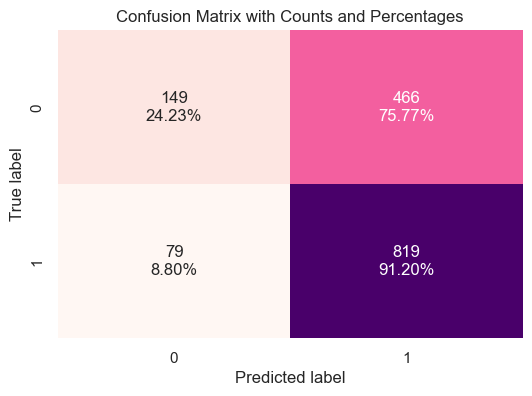

array([[149, 466],
       [ 79, 819]], dtype=int64)

In [352]:
# Print the class assignment for SEGMENT_1
print(f"Class mapping for 'SEGMENT_1': {le.classes_[0]} -> 0, {le.classes_[1]} -> 1")

# We've already defined the function `confusion_matrix_with_counts_and_percentage` earlier

# Call the function to display the confusion matrix for the Random Forest model
confusion_matrix_with_counts_and_percentage(optim_rf_classifier, x_test, y_test)

Again, graph for 1 tree:

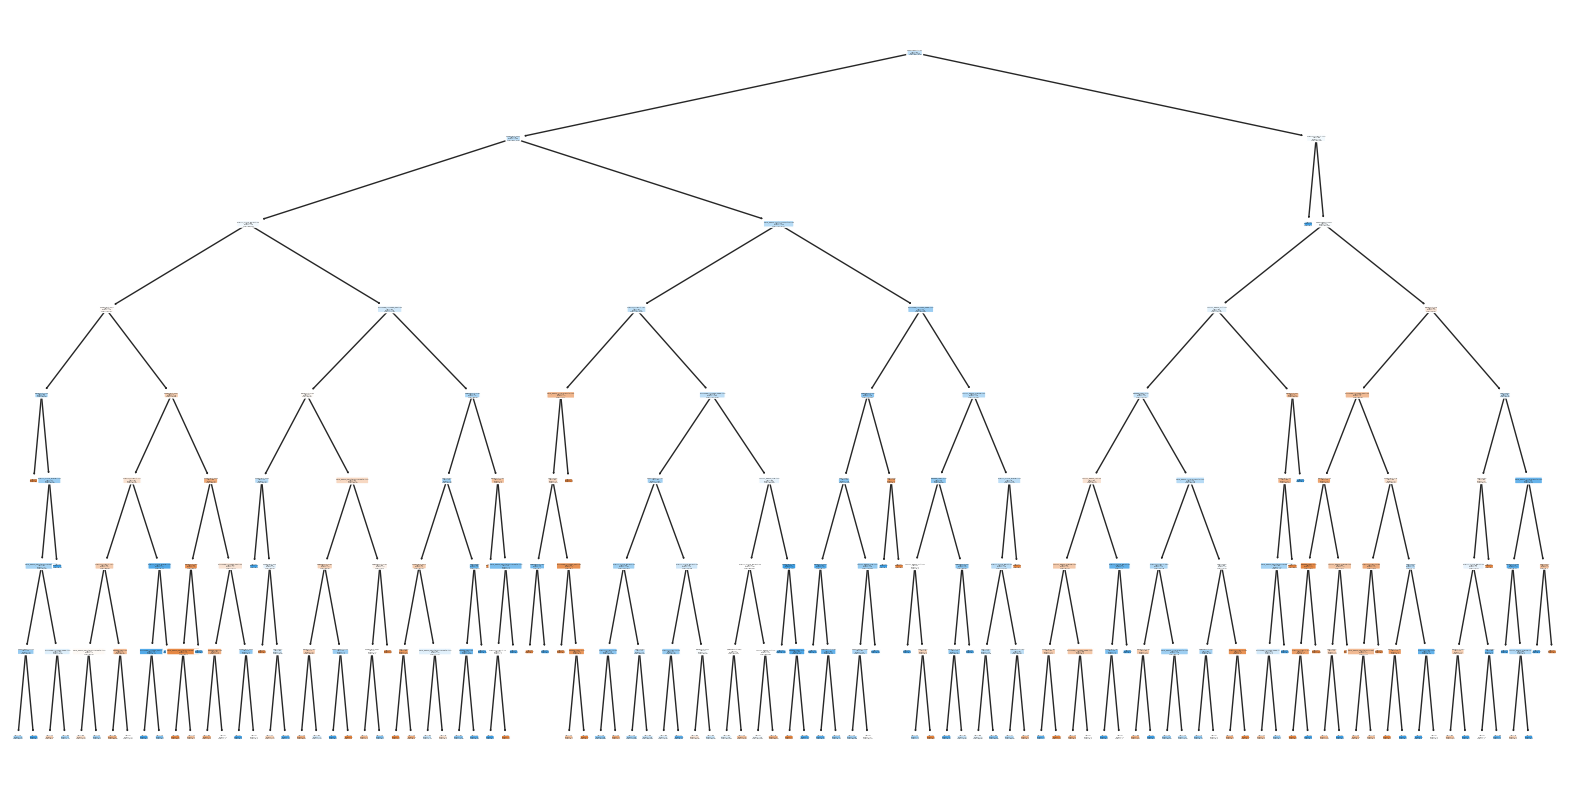

In [354]:
# Choose one tree from the forest
tree = optim_rf_classifier.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=x_train.columns, rounded=True)
plt.show()

### 3.2.2 Gradient Boost

#### Baseline Model Fit
To identify the best model, let's begin with a base Gradient Boosting model, setting *n_estimators* to 10, similar to our initial approach with the Random Forest base model.

In [357]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier object
gb_classifier = GradientBoostingClassifier(n_estimators=10, random_state=1)  # Specify 10 boosting stages (trees)

# Fit the classifier with the training data
gb_classifier.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=10, random_state=1)

In [358]:
# Get the parameters of the Gradient Boosting classifier model
params_gb_classifier = gb_classifier.get_params()

# Print the parameters
print(params_gb_classifier)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_iter_no_change': None, 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


Note that if we print params_gb_regressor (the variable containing the model's 'specifications'), we can see that the error criterion used is the friedman_mse, and the *max_depth* is set to 3 as a default value. Let's examine the results:

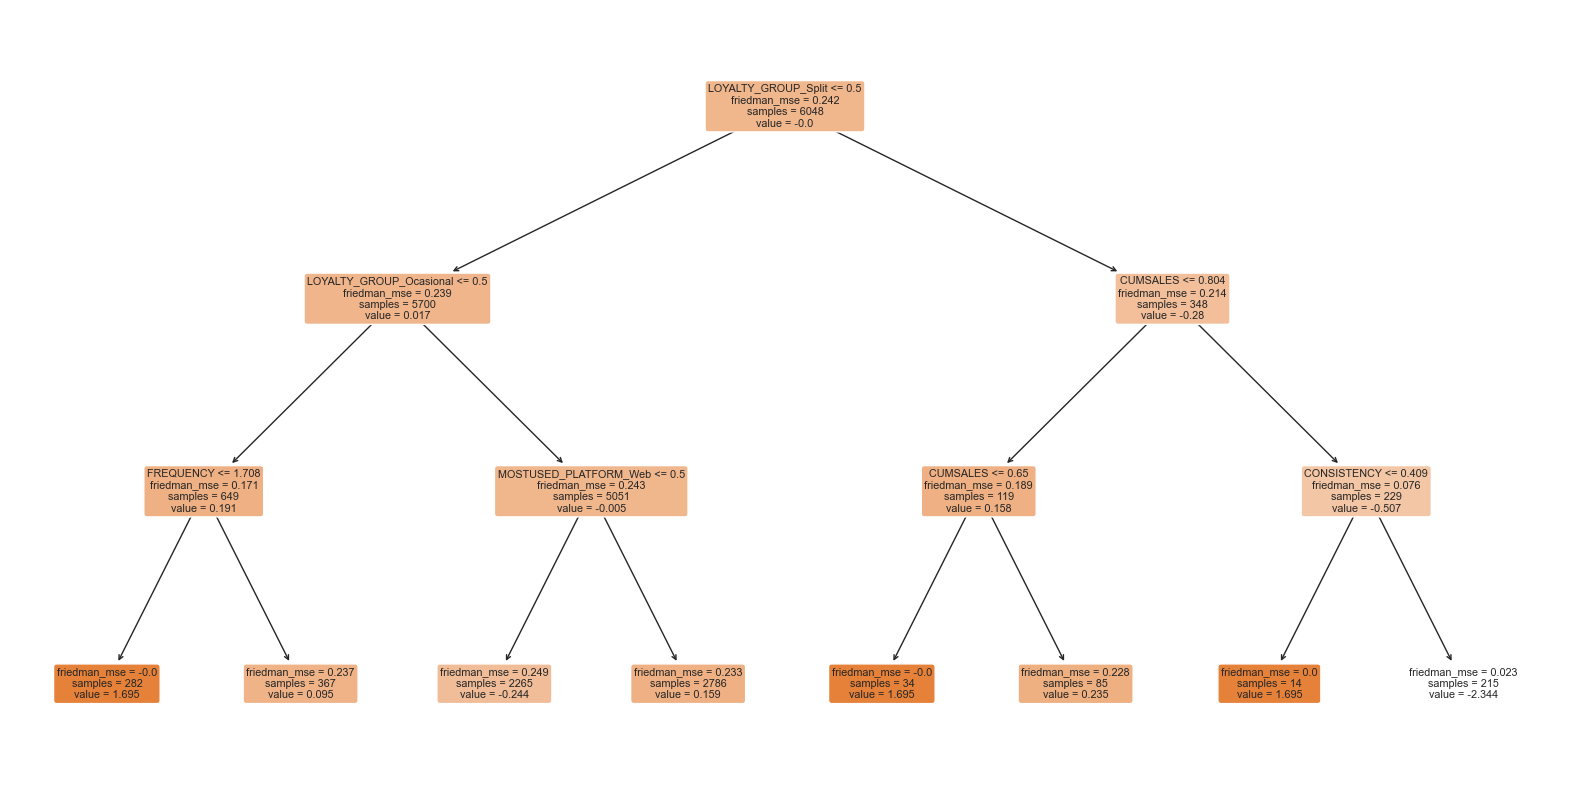

In [360]:
from sklearn.tree import plot_tree

# Choose which tree to visualize (0 for the first tree)
tree_index = 0

# Extract the tree from the classifier (use estimators_)
single_tree = gb_classifier.estimators_[tree_index, 0]

# Plot the specified decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=x_train.columns, rounded=True)
plt.show()

#### Baseline Model Results
The tree is both clear and easily interpretable, unlike in Random Forest. Now, let's review the performance measures, R-squared and MSE, for both the training and testing evaluations.

In [362]:
# Make predictions on the training data
y_train_gb_base_pred = gb_classifier.predict(x_train)

# Calculate accuracy, precision, recall, F1-score for the training data
accuracy_train_gb_base = accuracy_score(y_train, y_train_gb_base_pred)
precision_train_gb_base = precision_score(y_train, y_train_gb_base_pred, average='binary', zero_division=0)
recall_train_gb_base = recall_score(y_train, y_train_gb_base_pred, average='binary')
f1_train_gb_base = f1_score(y_train, y_train_gb_base_pred, average='binary')

# Make predictions using the model on the test data
y_test_gb_base_pred = gb_classifier.predict(x_test)

# Calculate accuracy, precision, recall, F1-score for the test data
accuracy_test_gb_base = accuracy_score(y_test, y_test_gb_base_pred)
precision_test_gb_base = precision_score(y_test, y_test_gb_base_pred, average='binary', zero_division=0)
recall_test_gb_base = recall_score(y_test, y_test_gb_base_pred, average='binary')
f1_test_gb_base = f1_score(y_test, y_test_gb_base_pred, average='binary')

# Create a summary table
metrics_gb_base = {
    'Accuracy': {'Train': accuracy_train_gb_base, 'Test': accuracy_test_gb_base},
    'Precision': {'Train': precision_train_gb_base, 'Test': precision_test_gb_base},
    'Recall': {'Train': recall_train_gb_base, 'Test': recall_test_gb_base},
    'F1 Score': {'Train': f1_train_gb_base, 'Test': f1_test_gb_base}
}

# Create the DataFrame from the dictionary
metrics_gb_base_df = pd.DataFrame(metrics_gb_base)
print('Results for Basic GB model')
metrics_gb_base_df.T

Results for Basic GB model


Train      Test
Accuracy   0.625661  0.635823
Precision  0.612056  0.620069
Recall     0.998599  0.997773
F1 Score   0.758944  0.764831

#### Hyperparameter Tuning
All the train and test metrics are very close. Seems like we have hit the right parameters for the trees. Let's check.

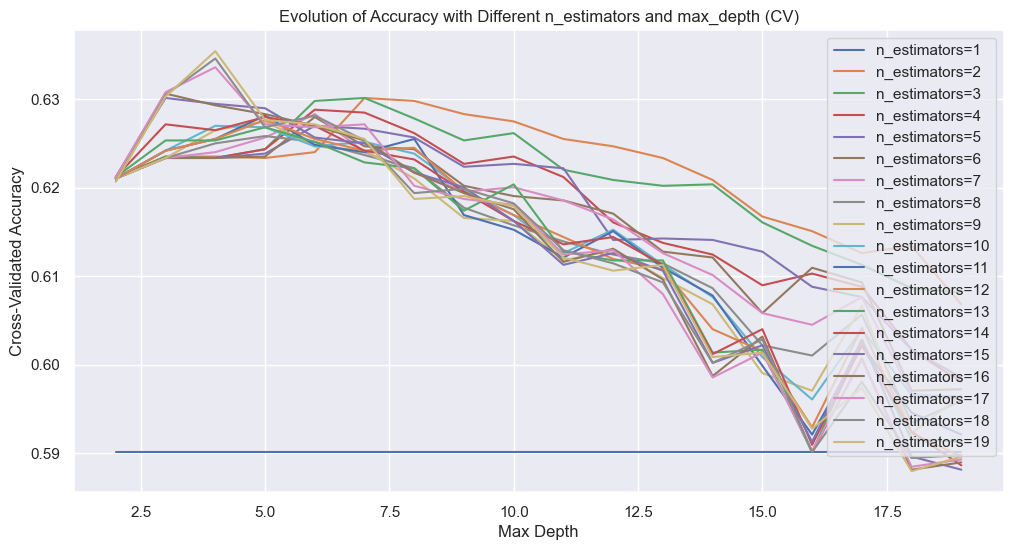

Optimal n_estimators: 19, Optimal max_depth: 4, Optimal Accuracy: 0.6354


In [364]:
def find_optimal_gb_params_and_plot_cv(x_train, y_train, n_estimators_range, max_depth_range, cv=5):
    # Initialize variables to store the optimal parameters and results for plotting
    max_accuracy = 0
    best_n_estimators = None
    best_max_depth = None
    plot_data = []

    # Iterate over all combinations of n_estimators and max_depth
    for n_estimators in n_estimators_range:
        for max_depth in max_depth_range:
            # Create GradientBoostingClassifier model
            gb = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=1)

            # Perform cross-validation
            cv_scores = cross_val_score(gb, x_train, y_train, cv=cv, scoring='accuracy')

            # Calculate mean CV accuracy
            accuracy = cv_scores.mean()
            plot_data.append((n_estimators, max_depth, accuracy))

            # Update the optimal parameters if current accuracy is higher than max_accuracy
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                best_n_estimators = n_estimators
                best_max_depth = max_depth

    # Plotting the results
    plot_df = pd.DataFrame(plot_data, columns=['n_estimators', 'max_depth', 'Accuracy'])
    fig, ax = plt.subplots(figsize=(12, 6))
    for n_estimator in n_estimators_range:
        subset = plot_df[plot_df['n_estimators'] == n_estimator]
        ax.plot(subset['max_depth'], subset['Accuracy'], label=f'n_estimators={n_estimator}')

    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Cross-Validated Accuracy')
    ax.set_title('Evolution of Accuracy with Different n_estimators and max_depth (CV)')
    ax.legend()
    plt.show()

    return best_n_estimators, best_max_depth, max_accuracy

# Example usage with CV
n_estimators_range = range(1, 20)  # Define ranges for n_estimators and max_depth
max_depth_range = range(2, 20)

optimal_n_estimators, optimal_max_depth, optimal_accuracy = find_optimal_gb_params_and_plot_cv(
    x_train, y_train, n_estimators_range, max_depth_range, cv=5
)

print(f"Optimal n_estimators: {optimal_n_estimators}, Optimal max_depth: {optimal_max_depth}, Optimal Accuracy: {optimal_accuracy:.4f}")


#### Optimal Model Fit
A model with 19 trees and a maximum depth of 4 per tree is optimal for achieving the higher accuracy.

In [366]:
# Create the optimal GradientBoostingClassifier
optim_gb_classifier = GradientBoostingClassifier(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=1)

#### Classification Metrics
Let's examine the measures of fit for this optimal model, both for training and testing.

In [368]:
# Create the optimal GradientBoostingClassifier
optim_gb_classifier = GradientBoostingClassifier(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=1)

# Perform cross-validation to evaluate performance on the training data (using accuracy, precision, recall, F1 score)
cv_accuracy_scores = cross_val_score(optim_gb_classifier, x_train, y_train, cv=5, scoring='accuracy')
cv_precision_scores = cross_val_score(optim_gb_classifier, x_train, y_train, cv=5, scoring='precision')
cv_recall_scores = cross_val_score(optim_gb_classifier, x_train, y_train, cv=5, scoring='recall')
cv_f1_scores = cross_val_score(optim_gb_classifier, x_train, y_train, cv=5, scoring='f1')

# Calculate mean CV scores
cv_accuracy = cv_accuracy_scores.mean()
cv_precision = cv_precision_scores.mean()
cv_recall = cv_recall_scores.mean()
cv_f1 = cv_f1_scores.mean()

# Now, fit the model on the full training data
optim_gb_classifier.fit(x_train, y_train)

# Predict on the test data
y_test_gb_optim_pred = optim_gb_classifier.predict(x_test)

# Calculate test set metrics
accuracy_test_gb_optim = accuracy_score(y_test, y_test_gb_optim_pred)
precision_test_gb_optim = precision_score(y_test, y_test_gb_optim_pred, zero_division=0)
recall_test_gb_optim = recall_score(y_test, y_test_gb_optim_pred)
f1_test_gb_optim = f1_score(y_test, y_test_gb_optim_pred)

# Create a summary table for both cross-validated train metrics and test metrics
GB_metrics = {
    'Accuracy': {'Train': cv_accuracy, 'Test': accuracy_test_gb_optim},
    'Precision': {'Train': cv_precision, 'Test': precision_test_gb_optim},
    'Recall': {'Train': cv_recall, 'Test': recall_test_gb_optim},
    'F1 Score': {'Train': cv_f1, 'Test': f1_test_gb_optim}
}

# Create the DataFrame from the dictionary and transpose it for easier comparison
GB_metrics_df = pd.DataFrame(GB_metrics).T

# Display the final DataFrame with performance metrics
print("Performance of Optimal Gradient Boosting Model:")
GB_metrics_df

Performance of Optimal Gradient Boosting Model:


Train      Test
Accuracy   0.635415  0.647720
Precision  0.619971  0.628612
Recall     0.987668  0.993318
F1 Score   0.761751  0.769961

Let's see the first tree

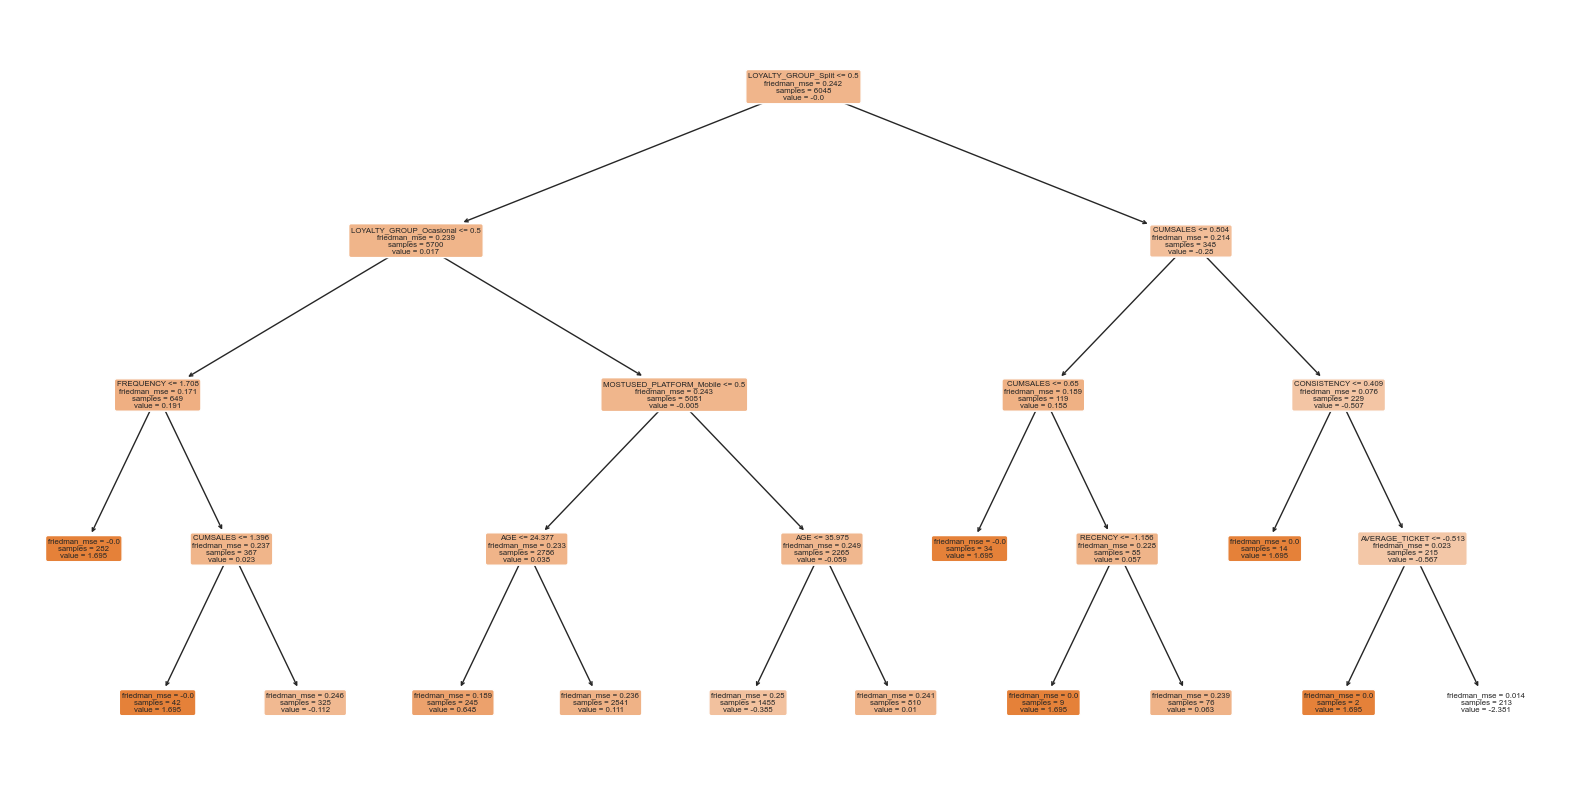

In [370]:
from sklearn.tree import plot_tree

# Choose which tree to visualize (0 for the first tree)
tree_index = 0

# Extract the tree from the classifier
single_tree = optim_gb_classifier.estimators_[tree_index, 0]  # Classifier version

# Plot the specified decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=x_train.columns, rounded=True)

# Save the plot to a file
plt.savefig('decision_tree.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

#### Feature Importance
Let's see the feature importance according the gradient boosting model.

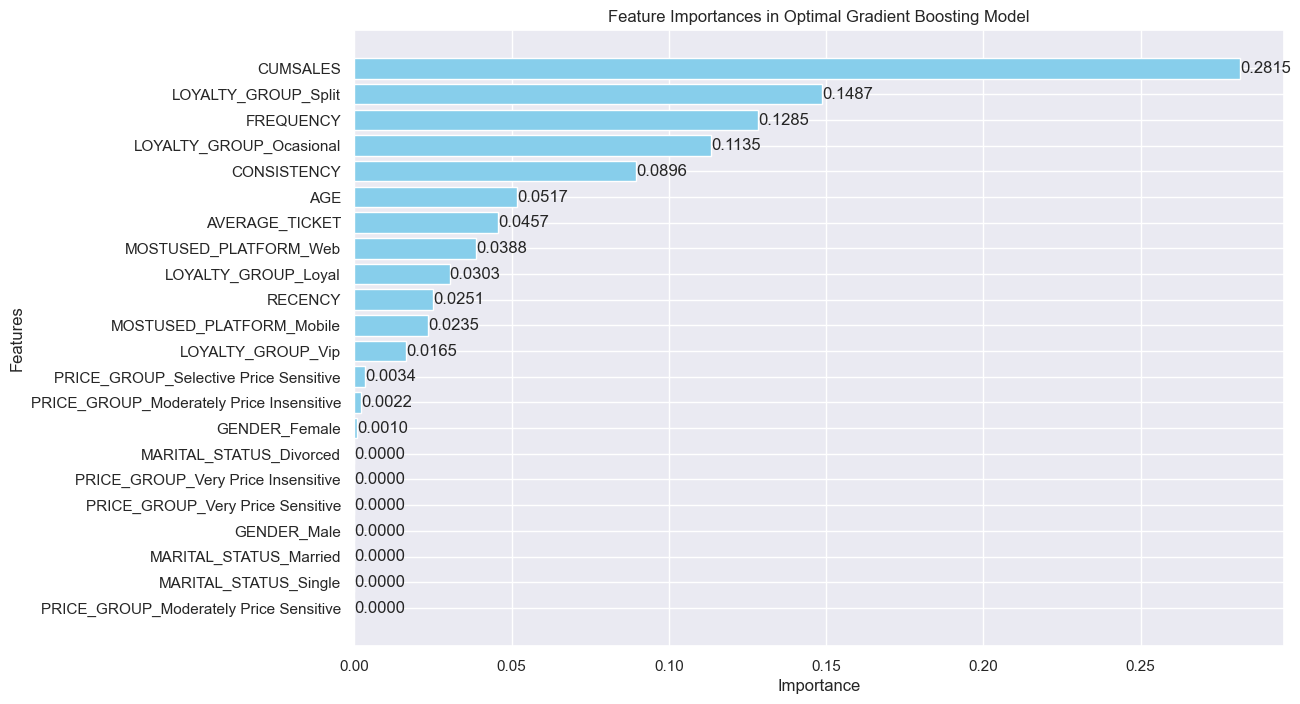

Feature Importances (Gradient Boosting):


Feature  Importance
0                                   CUMSALES    0.281549
1                        LOYALTY_GROUP_Split    0.148731
2                                  FREQUENCY    0.128477
3                    LOYALTY_GROUP_Ocasional    0.113491
4                                CONSISTENCY    0.089573
5                                        AGE    0.051684
6                             AVERAGE_TICKET    0.045677
7                      MOSTUSED_PLATFORM_Web    0.038798
8                        LOYALTY_GROUP_Loyal    0.030287
9                                    RECENCY    0.025051
10                  MOSTUSED_PLATFORM_Mobile    0.023502
11                         LOYALTY_GROUP_Vip    0.016548
12     PRICE_GROUP_Selective Price Sensitive    0.003450
13  PRICE_GROUP_Moderately Price Insensitive    0.002188
14                             GENDER_Female    0.000985
15                   MARITAL_STATUS_Divorced    0.000010
16        PRICE_GROUP_Very Price Insensitive    0.000000
17          PRICE_GROUP_Very Price Sensitive    0.000000
18                               GENDER_Male    0.000000
19                    MARITAL_STATUS_Married    0.000000
20                     MARITAL_STATUS_Single    0.000000
21    PRICE_GROUP_Moderately Price Sensitive    0.000000

In [372]:
# Get feature importances
feature_importances_gb = optim_gb_classifier.feature_importances_

# Create a DataFrame for feature importances
GB_coefficients_df = pd.DataFrame({
    'Feature': x_train.columns,  # Feature names
    'Importance': feature_importances_gb  # Feature importance from Gradient Boosting
})

# Sort the DataFrame by importance for better clarity
GB_coefficients_df = GB_coefficients_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot the feature importances (horizontal bar chart)
plt.figure(figsize=(12, 8))  # Adjust the size to accommodate many features
bars = plt.barh(GB_coefficients_df['Feature'], GB_coefficients_df['Importance'], color='skyblue')

# Add importance values on top of bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center')

# Invert y-axis for better readability
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Optimal Gradient Boosting Model')

# Display a horizontal scrollable plot by adjusting figsize width and label size
plt.show()

# Display the feature importances in a table
print("Feature Importances (Gradient Boosting):")
GB_coefficients_df

Even gradient boost model gave some of the features some of which are common as in previous models- not so predictive power with low coefficient values.

#### Confusion Matrix

In [375]:
# Print the class assignment for SEGMENT_1
print(f"Class mapping for 'SEGMENT_1': {le.classes_[0]} -> 0, {le.classes_[1]} -> 1")

# Call the function to display the confusion matrix for the Gradient Boosting model
confusion_matrix_with_counts_and_percentage(optim_gb_classifier, x_test, y_test)

Class mapping for 'SEGMENT_1': Core -> 0, Up -> 1


array([[ 88, 527],
       [  6, 892]], dtype=int64)

### 3.2.3 Support Vector Machine

#### Bivariate Plots
Using the pair plot from EDA on the dataset before scaling, just with its raw variables can give an idea on what specifc kernal could be more suited through eye-balling.

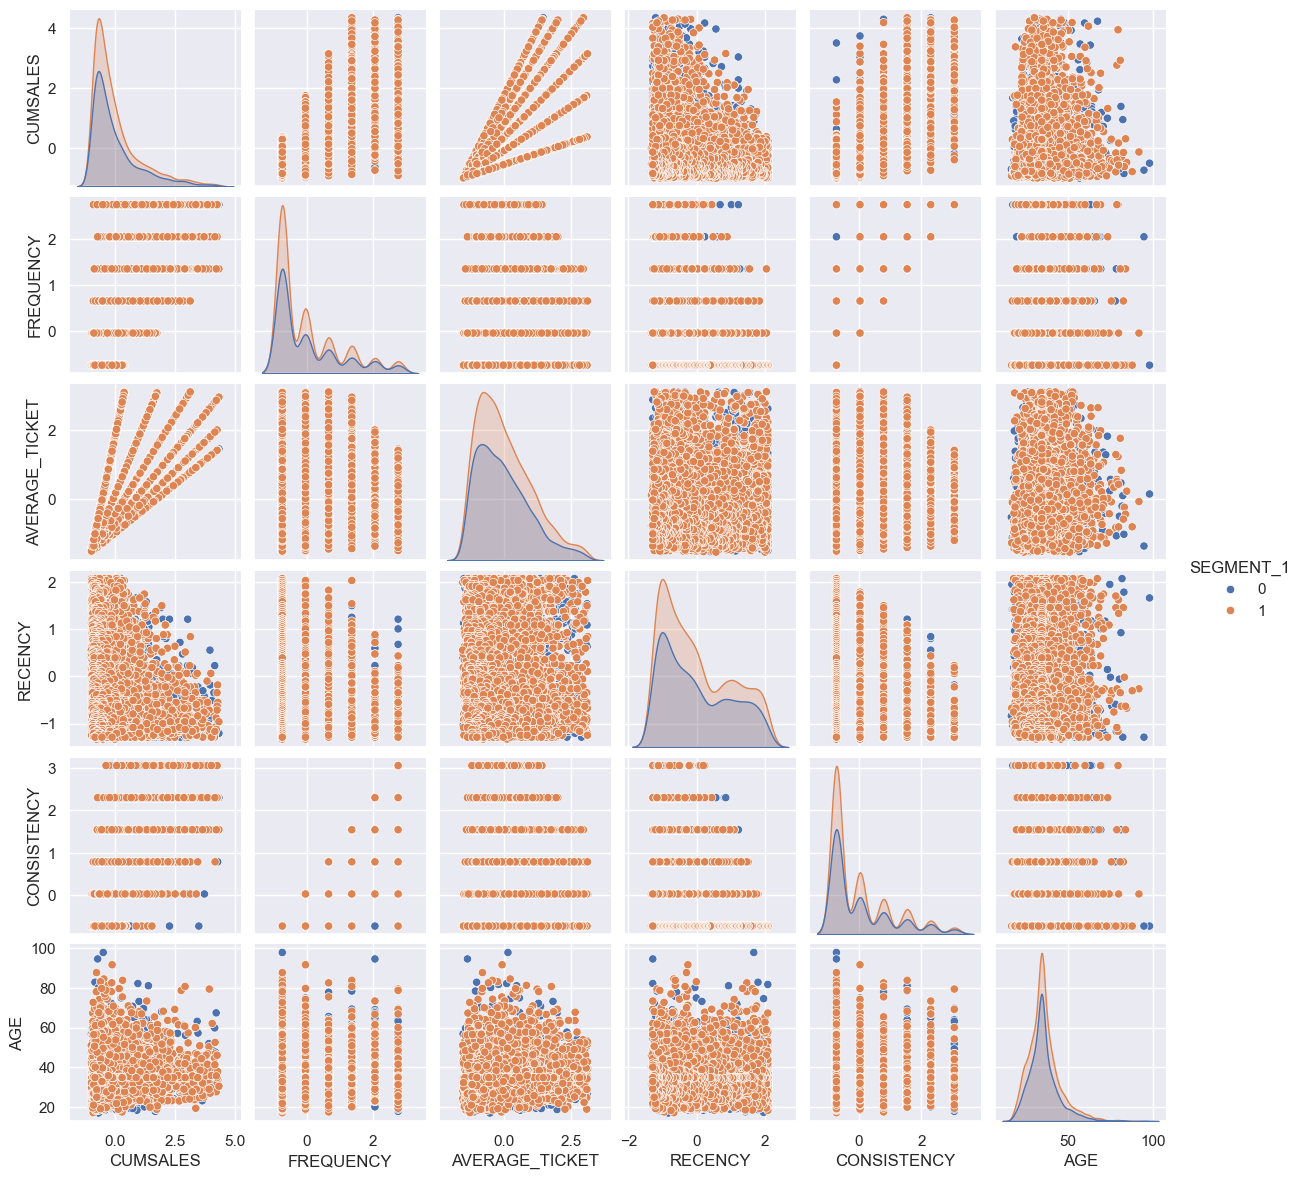

In [378]:
# Pair plot with 'SEGMENT_1' as the hue (color-coded by target class)
sns.pairplot(scaled_data, hue='SEGMENT_1', diag_kind='kde', height=2)
plt.show()

The above pairplot barely indicates any clear linear separation between the target classes among features. With the scattered points spread out everywhere, RBF Kernal or polynomial Kernal seems like better suited. But, even though pair plots might show scattered data in 2D, linear separation might be possible in higher dimensions. So, let's try all the Kernals which is better using Cross- validation.

#### Decision on Kernal- Linear Wins!

In [381]:
# Function to train and evaluate an SVM model with flexibility for C, gamma, and degree
def train_evaluate_svm(kernel_type, x_train, y_train, x_test, y_test, C=1, degree=3, gamma='scale'):
    svm_model = SVC(kernel=kernel_type, C=C, degree=degree, gamma=gamma, random_state=1)
    svm_model.fit(x_train, y_train)

    # Predictions
    y_train_pred = svm_model.predict(x_train)
    y_test_pred = svm_model.predict(x_test)

    # Metrics for Training Set
    metrics_train = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred)
    }

    # Metrics for Test Set
    metrics_test = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred)
    }

    return metrics_train, metrics_test

# Train and evaluate SVM kernels with different C and gamma values
# For linear kernel (no gamma or degree needed)
metrics_linear_train, metrics_linear_test = train_evaluate_svm('linear', x_train, y_train, x_test, y_test, C=1)

# For polynomial kernel (adjust C, gamma, degree)
metrics_poly_train, metrics_poly_test = train_evaluate_svm('poly', x_train, y_train, x_test, y_test, C=1, degree=3, gamma='scale')

# For RBF kernel (adjust C and gamma)
metrics_rbf_train, metrics_rbf_test = train_evaluate_svm('rbf', x_train, y_train, x_test, y_test, C=1, gamma='scale')

In [382]:
# Combine results into a DataFrame for easy comparison
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Linear (Train)': list(metrics_linear_train.values()),
    'Linear (Test)': list(metrics_linear_test.values()),
    'Polynomial (Train)': list(metrics_poly_train.values()),
    'Polynomial (Test)': list(metrics_poly_test.values()),
    'RBF (Train)': list(metrics_rbf_train.values()),
    'RBF (Test)': list(metrics_rbf_test.values())
}

# Convert to DataFrame and display
combined_metrics_df = pd.DataFrame(metrics_data)
print('===========================================================================================================')
print('COMPARISON OF METRICS FOR LINEAR, POLYNOMIAL, AND RBF KERNELS')
print('===========================================================================================================')
combined_metrics_df

COMPARISON OF METRICS FOR LINEAR, POLYNOMIAL, AND RBF KERNELS


Metric  Linear (Train)  Linear (Test)  Polynomial (Train)  \
0   Accuracy        0.611938       0.623265            0.591601   
1  Precision        0.607193       0.616147            0.591203   
2     Recall        0.969739       0.968820            0.998039   
3   F1 Score        0.746790       0.753247            0.742547   

   Polynomial (Test)  RBF (Train)  RBF (Test)  
0           0.597488     0.590112    0.593523  
1           0.595886     0.590112    0.593523  
2           1.000000     1.000000    1.000000  
3           0.746778     0.742227    0.744919

So, evidently, after evaluating over all the metrics Linear Kernal is chosen over others.

#### Hyperparameter Tuning

We'll perform a grid search to find the best C (regularization) value by cross-validating across multiple values of C.

In [385]:
# Define the parameter grid for C values
param_grid = {'C': [1, 10, 100, 500]}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(SVC(kernel='linear', random_state=1), param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=1),
             param_grid={'C': [1, 10, 100, 500]}, scoring='accuracy')

Best C value: 500


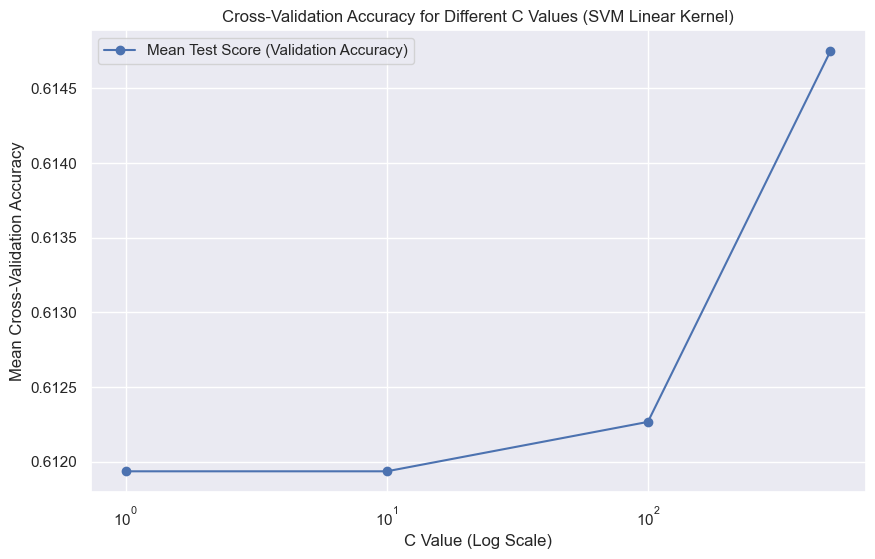

In [386]:
# Get the best C value found via cross-validation
best_C = grid_search.best_params_['C']
print(f'Best C value: {best_C}')

# Visualize C values vs accuracy changes
# Extract cross-validation results
results = pd.DataFrame(grid_search.cv_results_)

# Plot validation accuracy vs. C values
plt.figure(figsize=(10, 6))
plt.plot(param_grid['C'], results['mean_test_score'], marker='o', label='Mean Test Score (Validation Accuracy)')
plt.xscale('log')
plt.xlabel('C Value (Log Scale)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for Different C Values (SVM Linear Kernel)')
plt.grid(True)
plt.legend()
plt.show()

#### Optimal Model Fit 

#### Classification Metrics

Let's refit the model with the best C value-

In [390]:
# Now proceed with fitting the model using the best C value
# Refit the SVM model using the best C value found
final_svm_linear = SVC(kernel='linear', C=best_C, random_state=1)
final_svm_linear.fit(x_train, y_train)

# Make predictions on both train and test sets
y_train_pred_best = final_svm_linear.predict(x_train)
y_test_pred_best = final_svm_linear.predict(x_test)

# Evaluate the final model using both train and test sets
# Train set evaluation
accuracy_train = accuracy_score(y_train, y_train_pred_best)
precision_train = precision_score(y_train, y_train_pred_best)
recall_train = recall_score(y_train, y_train_pred_best)
f1_train = f1_score(y_train, y_train_pred_best)

# Test set evaluation
accuracy_test = accuracy_score(y_test, y_test_pred_best)
precision_test = precision_score(y_test, y_test_pred_best)
recall_test = recall_score(y_test, y_test_pred_best)
f1_test = f1_score(y_test, y_test_pred_best)

# Create a dictionary for train and test performance
SVM_metrics = {
    'Accuracy': {'Train Set': accuracy_train, 'Test Set': accuracy_test},
    'Precision': {'Train Set': precision_train, 'Test Set': precision_test},
    'Recall': {'Train Set': recall_train, 'Test Set': recall_test},
    'F1 Score': {'Train Set': f1_train, 'Test Set': f1_test}
}

# Convert the dictionary to a DataFrame for display
SVM_metrics_df = pd.DataFrame(SVM_metrics)

# Display the final DataFrame with performance metrics
print("Performance Metrics for SVM with Linear Kernel")
SVM_metrics_df

Performance Metrics for SVM with Linear Kernel


Accuracy  Precision    Recall  F1 Score
Train Set  0.617063   0.620088  0.906416  0.736399
Test Set   0.619960   0.624326  0.903118  0.738279

#### Feature Importance

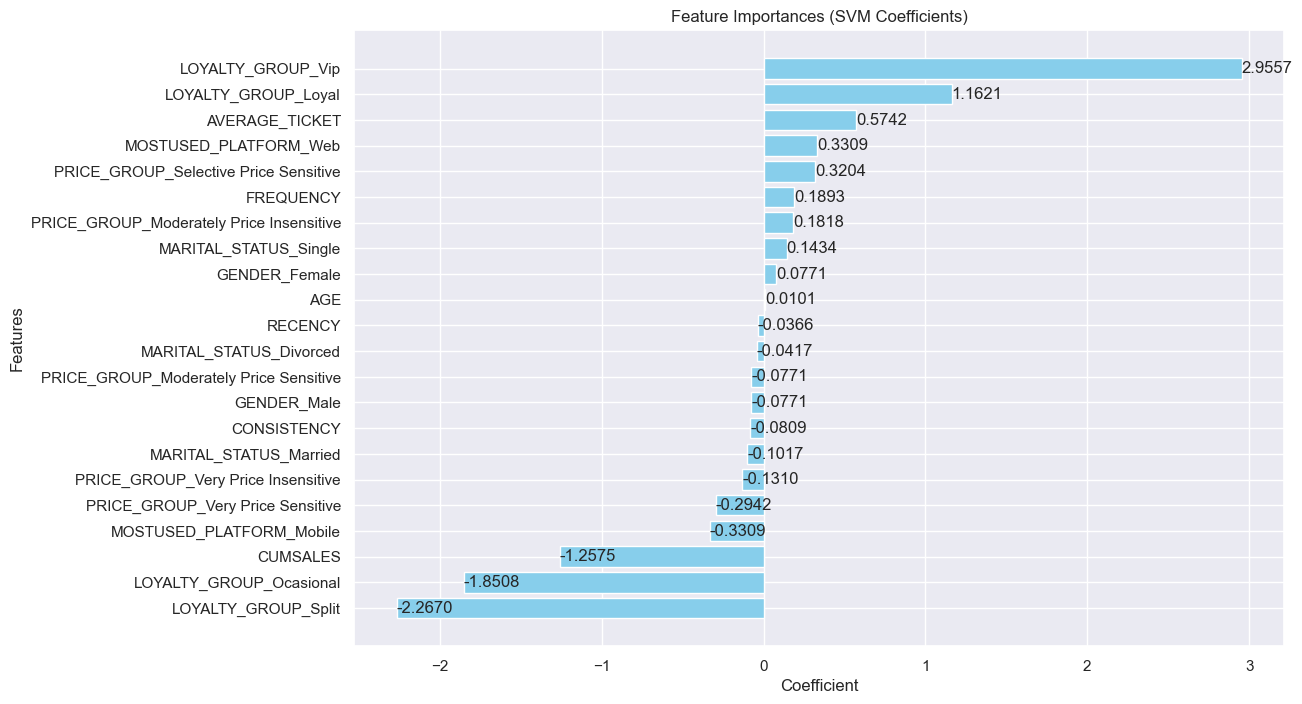

Feature Importances (SVM Coefficients):


Feature  Coefficient
0                          LOYALTY_GROUP_Vip     2.955691
1                        LOYALTY_GROUP_Loyal     1.162128
2                             AVERAGE_TICKET     0.574182
3                      MOSTUSED_PLATFORM_Web     0.330882
4      PRICE_GROUP_Selective Price Sensitive     0.320436
5                                  FREQUENCY     0.189321
6   PRICE_GROUP_Moderately Price Insensitive     0.181788
7                      MARITAL_STATUS_Single     0.143403
8                              GENDER_Female     0.077101
9                                        AGE     0.010129
10                                   RECENCY    -0.036567
11                   MARITAL_STATUS_Divorced    -0.041666
12    PRICE_GROUP_Moderately Price Sensitive    -0.077058
13                               GENDER_Male    -0.077101
14                               CONSISTENCY    -0.080879
15                    MARITAL_STATUS_Married    -0.101737
16        PRICE_GROUP_Very Price Insensitive    -0.131001
17          PRICE_GROUP_Very Price Sensitive    -0.294164
18                  MOSTUSED_PLATFORM_Mobile    -0.330882
19                                  CUMSALES    -1.257529
20                   LOYALTY_GROUP_Ocasional    -1.850786
21                       LOYALTY_GROUP_Split    -2.267033

In [392]:
# Retrieve the coefficients for the linear SVM
svm_coefficients = final_svm_linear.coef_[0]

# Create a DataFrame to display the coefficients alongside their corresponding feature names
SVM_coefficients_df = pd.DataFrame({
    'Feature': x_train.columns,  # Feature names
    'Coefficient': svm_coefficients  # Coefficients from SVM
})

# Sort the DataFrame by the absolute value of coefficients for better clarity
SVM_coefficients_df = SVM_coefficients_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

# Plot the feature importances (coefficients)
plt.figure(figsize=(12, 8))  # Adjusting the size to accommodate many features
bars = plt.barh(SVM_coefficients_df['Feature'], SVM_coefficients_df['Coefficient'], color='skyblue')

# Invert y-axis for better readability (largest importance on top)
plt.gca().invert_yaxis()

# Add coefficient values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center')

plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Feature Importances (SVM Coefficients)')
plt.show()

# Display the coefficients DataFrame
print("Feature Importances (SVM Coefficients):")
SVM_coefficients_df

#### Confusion Matrix

Class mapping for 'SEGMENT_1': Core -> 0, Up -> 1


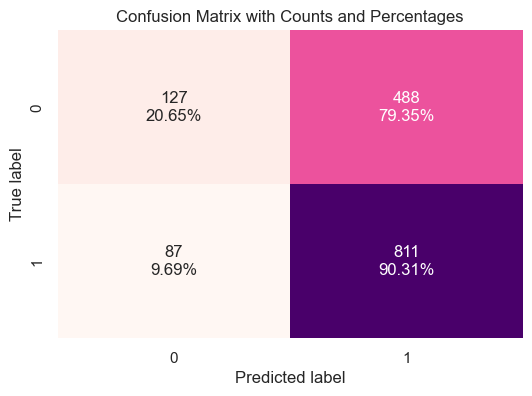

array([[127, 488],
       [ 87, 811]], dtype=int64)

In [394]:
# Print the class assignment for SEGMENT_1
print(f"Class mapping for 'SEGMENT_1': {le.classes_[0]} -> 0, {le.classes_[1]} -> 1")

# We already have the 'confusion_matrix_with_counts_and_percentage' function from earlier.
# Call the function to display the confusion matrix for SVM
confusion_matrix_with_counts_and_percentage(final_svm_linear, x_test, y_test)

# 5- Reporting Results

Class mapping for 'SEGMENT_1': Core -> 0, Up -> 1


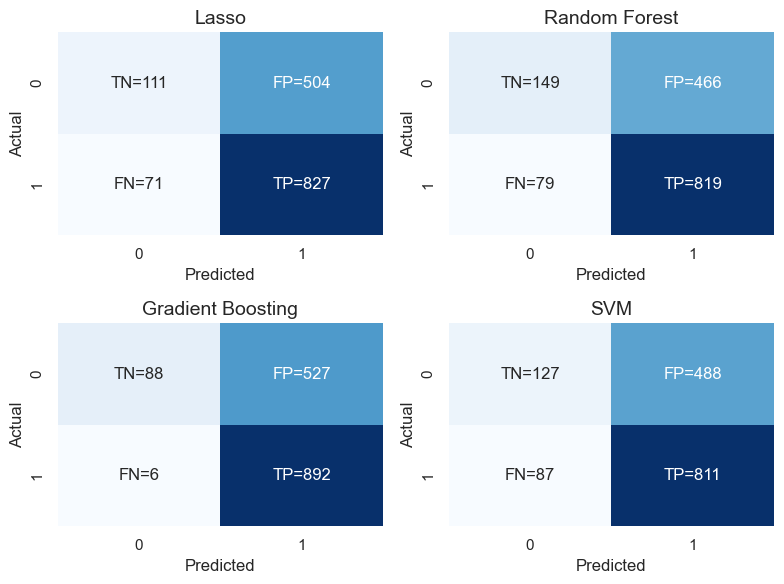

In [501]:
# Function to plot a single confusion matrix with TP, FP, TN, FN labels
def plot_confusion_matrix_with_labels(ax, model, X, y_true, model_name):
    y_pred = model.predict(X)
    cm = confusion_matrix(y_true, y_pred)

    # Calculate TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()

    # Create annotation labels with counts and TP, FP, TN, FN labels
    annot = [[f'TN={tn}', f'FP={fp}'], [f'FN={fn}', f'TP={tp}']]

    # Plot confusion matrix in the provided axes object
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', cbar=False, ax=ax, annot_kws={"size": 12})
    ax.set_title(f'{model_name}', fontsize=14)
    ax.set_ylabel('Actual', fontsize=12)
    ax.set_xlabel('Predicted', fontsize=12)

# Create a 2x2 grid for confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Plot each model's confusion matrix in a subplot

# Lasso
plot_confusion_matrix_with_labels(axes[0, 0], final_logreg_lasso, x_test, y_test, "Lasso")

# Random Forest
plot_confusion_matrix_with_labels(axes[0, 1], optim_rf_classifier, x_test, y_test, "Random Forest")

# Gradient Boosting
plot_confusion_matrix_with_labels(axes[1, 0], optim_gb_classifier, x_test, y_test, "Gradient Boosting")

# SVM
plot_confusion_matrix_with_labels(axes[1, 1], final_svm_linear, x_test, y_test, "SVM")

# Print the class assignment for SEGMENT_1
print(f"Class mapping for 'SEGMENT_1': {le.classes_[0]} -> 0, {le.classes_[1]} -> 1")

# Adjust layout for clarity
plt.tight_layout()
plt.show()

Out of all the above models, random forest seem to be performing better balance of both TP and TN negative values than others. However, although all the models including random forest, does a much better job at predicting UP (1) class, they do a worse job on predicting Core (0) class. 

In [503]:
# Define a function to extract TP, TN, FP, FN, and Accuracy from the confusion matrix
def extract_metrics_from_confusion_matrix(y_true, y_pred):
    """
    Extracts TP, TN, FP, FN, and calculates accuracy from the confusion matrix.
    
    Parameters:
    y_true: array-like, true labels
    y_pred: array-like, predicted labels
    
    Returns:
    metrics_dict: dictionary containing TP, TN, FP, FN, and accuracy
    """
    cm = confusion_matrix(y_true, y_pred)
    
    # Extracting TN, FP, FN, TP from the confusion matrix
    tn, fp, fn, tp = cm.ravel()
    
    # Calculating accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # Returning metrics as a dictionary
    metrics_dict = {
        'Accuracy': accuracy,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn
    }
    
    return metrics_dict

# Extract confusion matrix metrics for each model
logreg_metrics = extract_metrics_from_confusion_matrix(y_test, final_logreg_lasso.predict(x_test))
rf_metrics = extract_metrics_from_confusion_matrix(y_test, optim_rf_classifier.predict(x_test))
gb_metrics = extract_metrics_from_confusion_matrix(y_test, optim_gb_classifier.predict(x_test))
svm_metrics = extract_metrics_from_confusion_matrix(y_test, final_svm_linear.predict(x_test))

# Combine metrics from all models into a single DataFrame
all_models_metrics = {
    'Logistic Regression (Lasso)': logreg_metrics,
    'Random Forest': rf_metrics,
    'Gradient Boosting': gb_metrics,
    'SVM (Linear)': svm_metrics
}

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(all_models_metrics).T

# Display the summary table with Accuracy, TP, TN, FP, FN
print("Confusion Matrix Metrics (Accuracy, TP, TN, FP, FN) for All Models:")
metrics_df

Confusion Matrix Metrics (Accuracy, TP, TN, FP, FN) for All Models:


Accuracy     TP     TN     FP    FN
Logistic Regression (Lasso)  0.619960  827.0  111.0  504.0  71.0
Random Forest                0.639788  819.0  149.0  466.0  79.0
Gradient Boosting            0.647720  892.0   88.0  527.0   6.0
SVM (Linear)                 0.619960  811.0  127.0  488.0  87.0

Although Gradient Boosting overtook all other models, still random forest built with optimal hyperparameters 18 tress and depth of 8 per tree hit a better balance of accuracy and other metrics as well- TP, FP, TN, FN. 

In [532]:
# Assuming you have the importance DataFrames (already sorted by importance)
# Here we align all the models by using the same feature order for all models

# First, determine the order of features based on one model (e.g., Random Forest)
feature_order = RF_coefficients_df['Feature']

# Now, ensure that all other models follow the same feature order by reindexing
lasso_coefficients_df = lasso_coefficients_df.set_index('Feature').reindex(feature_order).reset_index()
GB_coefficients_df = GB_coefficients_df.set_index('Feature').reindex(feature_order).reset_index()
svm_coefficients_df = SVM_coefficients_df.set_index('Feature').reindex(feature_order).reset_index()

# Plot feature importance for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Random Forest (Top Left)
axs[0, 0].barh(RF_coefficients_df['Feature'], RF_coefficients_df['Importance'], color='skyblue')
axs[0, 0].set_title('Random Forest Feature Importance')
axs[0, 0].set_xlabel('Importance')
axs[0, 0].set_ylabel('Features')  # Show variable names on the y-axis

# Lasso (Top Right)
axs[0, 1].barh(lasso_coefficients_df['Feature'], lasso_coefficients_df['Coefficient'], color='lightgreen')
axs[0, 1].set_title('Lasso Feature Importance')
axs[0, 1].set_xlabel('Coefficient')
axs[0, 1].set_yticks([])  # Remove the y-tick labels

# Gradient Boosting (Bottom Left)
axs[1, 0].barh(GB_coefficients_df['Feature'], GB_coefficients_df['Importance'], color='coral')
axs[1, 0].set_title('Gradient Boosting Feature Importance')
axs[1, 0].set_xlabel('Importance')
axs[1, 0].set_ylabel('Features')  # Show variable names on the y-axis

# SVM (Bottom Right)
axs[1, 1].barh(SVM_coefficients_df['Feature'], SVM_coefficients_df['Coefficient'], color='lightcoral')
axs[1, 1].set_title('SVM Feature Importance')
axs[1, 1].set_xlabel('Coefficient')
axs[1, 1].set_yticks([])  # Remove the y-tick labels

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Among all the models, features like cummulative sales, average ticket are higher than any others. Features like Gender clearly stands out after by almost 0 coefficients. In future, we can handpick a few variables, and then refit the models using CV so that very less useful features are eliminated by potentially better one's. If the goal is to make as a good a best predictive performance model as possible, SVM/ Gradient models with large sequence of hyparameter tuning can be achieved. If otherwise quick enough solution can be drwan easily random forest, lasso logreg these all good a very much better job at speed atleast.